In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
import plotly.express as px
import seaborn as sns
import plotly.graph_objects as go
import math
from plotly.subplots import make_subplots
import numpy as np
from numpy import linalg as LA
import plotly.express as px
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import warnings

warnings.filterwarnings('ignore')

from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
import plotly.express as px
import seaborn as sns
import plotly.graph_objects as go
import math
from plotly.subplots import make_subplots
import numpy as np
from numpy import linalg as LA
import plotly.express as px
import pandas as pd
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (accuracy_score, recall_score, f1_score, 
                             classification_report, confusion_matrix)
from sklearn.decomposition import PCA

# Data Exploration 

In [2]:
data = pd.read_csv("/kaggle/input/child-mind-institute-problematic-internet-use/train.csv")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
data.shape

(3960, 82)

In [4]:
data.head()

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,Physical-Waist_Circumference,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,Fitness_Endurance-Season,Fitness_Endurance-Max_Stage,Fitness_Endurance-Time_Mins,Fitness_Endurance-Time_Sec,FGC-Season,FGC-FGC_CU,FGC-FGC_CU_Zone,FGC-FGC_GSND,FGC-FGC_GSND_Zone,FGC-FGC_GSD,FGC-FGC_GSD_Zone,FGC-FGC_PU,FGC-FGC_PU_Zone,FGC-FGC_SRL,FGC-FGC_SRL_Zone,FGC-FGC_SRR,FGC-FGC_SRR_Zone,FGC-FGC_TL,FGC-FGC_TL_Zone,BIA-Season,BIA-BIA_Activity_Level_num,BIA-BIA_BMC,BIA-BIA_BMI,BIA-BIA_BMR,BIA-BIA_DEE,BIA-BIA_ECW,BIA-BIA_FFM,BIA-BIA_FFMI,BIA-BIA_FMI,BIA-BIA_Fat,BIA-BIA_Frame_num,BIA-BIA_ICW,BIA-BIA_LDM,BIA-BIA_LST,BIA-BIA_SMM,BIA-BIA_TBW,PAQ_A-Season,PAQ_A-PAQ_A_Total,PAQ_C-Season,PAQ_C-PAQ_C_Total,PCIAT-Season,PCIAT-PCIAT_01,PCIAT-PCIAT_02,PCIAT-PCIAT_03,PCIAT-PCIAT_04,PCIAT-PCIAT_05,PCIAT-PCIAT_06,PCIAT-PCIAT_07,PCIAT-PCIAT_08,PCIAT-PCIAT_09,PCIAT-PCIAT_10,PCIAT-PCIAT_11,PCIAT-PCIAT_12,PCIAT-PCIAT_13,PCIAT-PCIAT_14,PCIAT-PCIAT_15,PCIAT-PCIAT_16,PCIAT-PCIAT_17,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,7.0,0.0,6.0,0.0,6.0,1.0,Fall,2.0,2.66855,16.8792,932.498,1492.00,8.25598,41.5862,13.8177,3.06143,9.21377,1.0,24.4349,8.89536,38.9177,19.5413,32.6909,NaN,NaN,NaN,NaN,Fall,5.0,4.0,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,4.0,0.0,4.0,4.0,4.0,4.0,4.0,4.0,2.0,4.0,55.0,NaN,NaN,NaN,Fall,3.0,2.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,22.0,75.0,70.0,122.0,NaN,NaN,NaN,NaN,Fall,3.0,0.0,NaN,NaN,NaN,NaN,5.0,0.0,11.0,1.0,11.0,1.0,3.0,0.0,Winter,2.0,2.57949,14.0371,936.656,1498.65,6.01993,42.0291,12.8254,1.21172,3.97085,1.0,21.0352,14.97400,39.4497,15.4107,27.0552,NaN,NaN,Fall,2.340,Fall,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Fall,46.0,64.0,Summer,0.0,0.0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,NaN,65.0,94.0,117.0,Fall,5.0,7.0,33.0,Fall,20.0,1.0,10.2,1.0,14.7,2.0,7.0,1.0,10.0,1.0,10.0,1.0,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Summer,2.170,Fall,5.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,2.0,1.0,1.0,28.0,Fall,38.0,54.0,Summer,2.0,0.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,NaN,60.0,97.0,117.0,Summer,6.0,9.0,37.0,Summer,18.0,1.0,NaN,NaN,NaN,NaN,5.0,0.0,7.0,0.0,7.0,0.0,7.0,1.0,Summer,3.0,3.84191,18.2943,1131.430,1923.44,15.59250,62.7757,14.0740,4.22033,18.82430,2.0,30.4041,16.77900,58.9338,26.4798,45.9966,NaN,NaN,Winter,2.451,Summer,4.0,2.0,4.0,0.0,5.0,1.0,0.0,3.0,2.0,2.0,3.0,0.0,3.0,0.0,0.0,3.0,4.0,3.0,4.0,1.0,44.0,Summer,31.0,45.0,Winter,0.0,1.0
4,0016bb22,Spring,18,1,Summer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Summer,1.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3960 entries, 0 to 3959
Data columns (total 82 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   id                                      3960 non-null   object 
 1   Basic_Demos-Enroll_Season               3960 non-null   object 
 2   Basic_Demos-Age                         3960 non-null   int64  
 3   Basic_Demos-Sex                         3960 non-null   int64  
 4   CGAS-Season                             2555 non-null   object 
 5   CGAS-CGAS_Score                         2421 non-null   float64
 6   Physical-Season                         3310 non-null   object 
 7   Physical-BMI                            3022 non-null   float64
 8   Physical-Height                         3027 non-null   float64
 9   Physical-Weight                         3076 non-null   float64
 10  Physical-Waist_Circumference            898 non-null    floa

In [6]:
data.drop('id', axis=1 , inplace = True)


In [7]:
data.duplicated().sum()

137

In [8]:
data.drop_duplicates(inplace=True)

In [9]:
data.duplicated().sum()

0

In [10]:
data.describe()

,Basic_Demos-Age,Basic_Demos-Sex,CGAS-CGAS_Score,Physical-BMI,Physical-Height,Physical-Weight,Physical-Waist_Circumference,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,Fitness_Endurance-Max_Stage,Fitness_Endurance-Time_Mins,Fitness_Endurance-Time_Sec,FGC-FGC_CU,FGC-FGC_CU_Zone,FGC-FGC_GSND,FGC-FGC_GSND_Zone,FGC-FGC_GSD,FGC-FGC_GSD_Zone,FGC-FGC_PU,FGC-FGC_PU_Zone,FGC-FGC_SRL,FGC-FGC_SRL_Zone,FGC-FGC_SRR,FGC-FGC_SRR_Zone,FGC-FGC_TL,FGC-FGC_TL_Zone,BIA-BIA_Activity_Level_num,BIA-BIA_BMC,BIA-BIA_BMI,BIA-BIA_BMR,BIA-BIA_DEE,BIA-BIA_ECW,BIA-BIA_FFM,BIA-BIA_FFMI,BIA-BIA_FMI,BIA-BIA_Fat,BIA-BIA_Frame_num,BIA-BIA_ICW,BIA-BIA_LDM,BIA-BIA_LST,BIA-BIA_SMM,BIA-BIA_TBW,PAQ_A-PAQ_A_Total,PAQ_C-PAQ_C_Total,PCIAT-PCIAT_01,PCIAT-PCIAT_02,PCIAT-PCIAT_03,PCIAT-PCIAT_04,PCIAT-PCIAT_05,PCIAT-PCIAT_06,PCIAT-PCIAT_07,PCIAT-PCIAT_08,PCIAT-PCIAT_09,PCIAT-PCIAT_10,PCIAT-PCIAT_11,PCIAT-PCIAT_12,PCIAT-PCIAT_13,PCIAT-PCIAT_14,PCIAT-PCIAT_15,PCIAT-PCIAT_16,PCIAT-PCIAT_17,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-computerinternet_hoursday,sii
count,3823.000000,3823.000000,2421.000000,3022.000000,3027.000000,3076.000000,898.000000,2954.000000,2967.000000,2954.000000,743.000000,740.000000,740.000000,2322.000000,2282.000000,1074.000000,1062.000000,1074.000000,1063.000000,2310.000000,2271.000000,2305.000000,2267.000000,2307.000000,2269.000000,2324.000000,2285.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.00000,1991.000000,1991.000000,1991.000000,475.000000,1721.000000,2733.000000,2734.000000,2731.000000,2731.000000,2729.000000,2732.000000,2729.000000,2730.000000,2730.000000,2733.000000,2734.000000,2731.000000,2729.000000,2732.000000,2730.000000,2728.000000,2725.000000,2728.000000,2730.000000,2733.000000,2736.000000,2609.000000,2606.000000,3297.000000,2736.000000
mean,10.459325,0.370913,65.454771,19.331929,55.946713,89.038615,27.278508,69.648951,81.597236,116.983074,4.989233,7.370270,27.581081,11.259690,0.476337,22.420438,1.829567,23.518622,1.904045,5.579654,0.330251,8.694924,0.618880,8.805635,0.620097,9.252775,0.785558,2.651431,6.719826,19.367048,1237.018187,2064.693747,20.825346,74.021708,15.030554,4.336495,16.855020,1.745354,33.173380,20.02299,67.301883,34.389466,53.998726,2.178853,2.589550,2.370655,2.177762,2.399854,0.839253,2.297545,1.063690,0.586295,1.246520,1.062637,1.304793,1.685443,0.244599,1.340051,1.035505,1.499634,1.452346,1.627890,1.613636,1.158974,0.943652,27.896199,41.088923,57.763622,1.061268,0.580409
std,3.597103,0.483112,22.341862,5.113934,7.473764,44.569040,5.567287,13.611226,13.665196,17.061225,2.014072,3.189662,17.707751,11.807781,0.499549,10.833995,0.612585,11.148951,0.612344,7.390161,0.470407,3.429301,0.485769,3.422167,0.485469,2.988863,0.410525,1.028267,92.586325,5.047848,1872.383246,2836.246272,73.266287,199.433753,5.792505,6.356402,199.372119,0.680635,56.272346,70.21561,108.705918,84.050607,129.362539,0.849476,0.783937,1.673312,1.697117,1.588807,1.195601,1.705218,1.268282,1.049355,1.342582,1.258797,1.331715,1.543074,0.522956,1.411156,1.301712,1.492929,1.495600,1.445622,1.529178,1.343661,1.185460,20.338853,10.427433,13.196091,1.094950,0.771122
min,5.000000,0.000000,25.000000,0.000000,33.000000,0.000000,18.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-7.789610,0.048267,813.397000,1073.450000,1.789450,28.900400,7.864850,-194.163000,-8745.080000,1.000000,14.489000,4.63581,23.620100,4.655730,20.589200,0.660000,0.580000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,38.000000,0.000000,0.000000
25%,8.000000,0.000000,59.000000,15.869350,50.000000,57.200000

In [11]:
data.isnull().sum()

Basic_Demos-Enroll_Season                    0
Basic_Demos-Age                              0
Basic_Demos-Sex                              0
CGAS-Season                               1270
CGAS-CGAS_Score                           1402
Physical-Season                            516
Physical-BMI                               801
Physical-Height                            796
Physical-Weight                            747
Physical-Waist_Circumference              2925
Physical-Diastolic_BP                      869
Physical-HeartRate                         856
Physical-Systolic_BP                       869
Fitness_Endurance-Season                  2515
Fitness_Endurance-Max_Stage               3080
Fitness_Endurance-Time_Mins               3083
Fitness_Endurance-Time_Sec                3083
FGC-Season                                 482
FGC-FGC_CU                                1501
FGC-FGC_CU_Zone                           1541
FGC-FGC_GSND                              2749
FGC-FGC_GSND_

In [12]:
num_cols = [col for col in data.columns if data[col].dtype != 'O']
cat_cols = [col for col in data.columns if col not in num_cols]
print(f'Numerical columns: {num_cols}')
print("-------------------")
print(f'Categorical columns: {cat_cols}')

Numerical columns: ['Basic_Demos-Age', 'Basic_Demos-Sex', 'CGAS-CGAS_Score', 'Physical-BMI', 'Physical-Height', 'Physical-Weight', 'Physical-Waist_Circumference', 'Physical-Diastolic_BP', 'Physical-HeartRate', 'Physical-Systolic_BP', 'Fitness_Endurance-Max_Stage', 'Fitness_Endurance-Time_Mins', 'Fitness_Endurance-Time_Sec', 'FGC-FGC_CU', 'FGC-FGC_CU_Zone', 'FGC-FGC_GSND', 'FGC-FGC_GSND_Zone', 'FGC-FGC_GSD', 'FGC-FGC_GSD_Zone', 'FGC-FGC_PU', 'FGC-FGC_PU_Zone', 'FGC-FGC_SRL', 'FGC-FGC_SRL_Zone', 'FGC-FGC_SRR', 'FGC-FGC_SRR_Zone', 'FGC-FGC_TL', 'FGC-FGC_TL_Zone', 'BIA-BIA_Activity_Level_num', 'BIA-BIA_BMC', 'BIA-BIA_BMI', 'BIA-BIA_BMR', 'BIA-BIA_DEE', 'BIA-BIA_ECW', 'BIA-BIA_FFM', 'BIA-BIA_FFMI', 'BIA-BIA_FMI', 'BIA-BIA_Fat', 'BIA-BIA_Frame_num', 'BIA-BIA_ICW', 'BIA-BIA_LDM', 'BIA-BIA_LST', 'BIA-BIA_SMM', 'BIA-BIA_TBW', 'PAQ_A-PAQ_A_Total', 'PAQ_C-PAQ_C_Total', 'PCIAT-PCIAT_01', 'PCIAT-PCIAT_02', 'PCIAT-PCIAT_03', 'PCIAT-PCIAT_04', 'PCIAT-PCIAT_05', 'PCIAT-PCIAT_06', 'PCIAT-PCIAT_07', 'PC

In [13]:
def detect_outliers_iqr(df):
    outlier_indices = []

    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outlier_indices.extend(outliers.index)

        print(f'Outliers in {column}:', outliers.shape[0])

    return outlier_indices

In [14]:
outlier_indices = detect_outliers_iqr(data)
print("Total outliers detected:", len(set(outlier_indices)))

Outliers in Basic_Demos-Age: 37
Outliers in Basic_Demos-Sex: 0
Outliers in CGAS-CGAS_Score: 6
Outliers in Physical-BMI: 128
Outliers in Physical-Height: 0
Outliers in Physical-Weight: 77
Outliers in Physical-Waist_Circumference: 25
Outliers in Physical-Diastolic_BP: 123
Outliers in Physical-HeartRate: 22
Outliers in Physical-Systolic_BP: 135
Outliers in Fitness_Endurance-Max_Stage: 10
Outliers in Fitness_Endurance-Time_Mins: 56
Outliers in Fitness_Endurance-Time_Sec: 0
Outliers in FGC-FGC_CU: 116
Outliers in FGC-FGC_CU_Zone: 0
Outliers in FGC-FGC_GSND: 46
Outliers in FGC-FGC_GSND_Zone: 0
Outliers in FGC-FGC_GSD: 46
Outliers in FGC-FGC_GSD_Zone: 408
Outliers in FGC-FGC_PU: 81
Outliers in FGC-FGC_PU_Zone: 0
Outliers in FGC-FGC_SRL: 123
Outliers in FGC-FGC_SRL_Zone: 0
Outliers in FGC-FGC_SRR: 114
Outliers in FGC-FGC_SRR_Zone: 0
Outliers in FGC-FGC_TL: 3
Outliers in FGC-FGC_TL_Zone: 490
Outliers in BIA-BIA_Activity_Level_num: 85
Outliers in BIA-BIA_BMC: 111
Outliers in BIA-BIA_BMI: 86
Outl

# Data Analysis

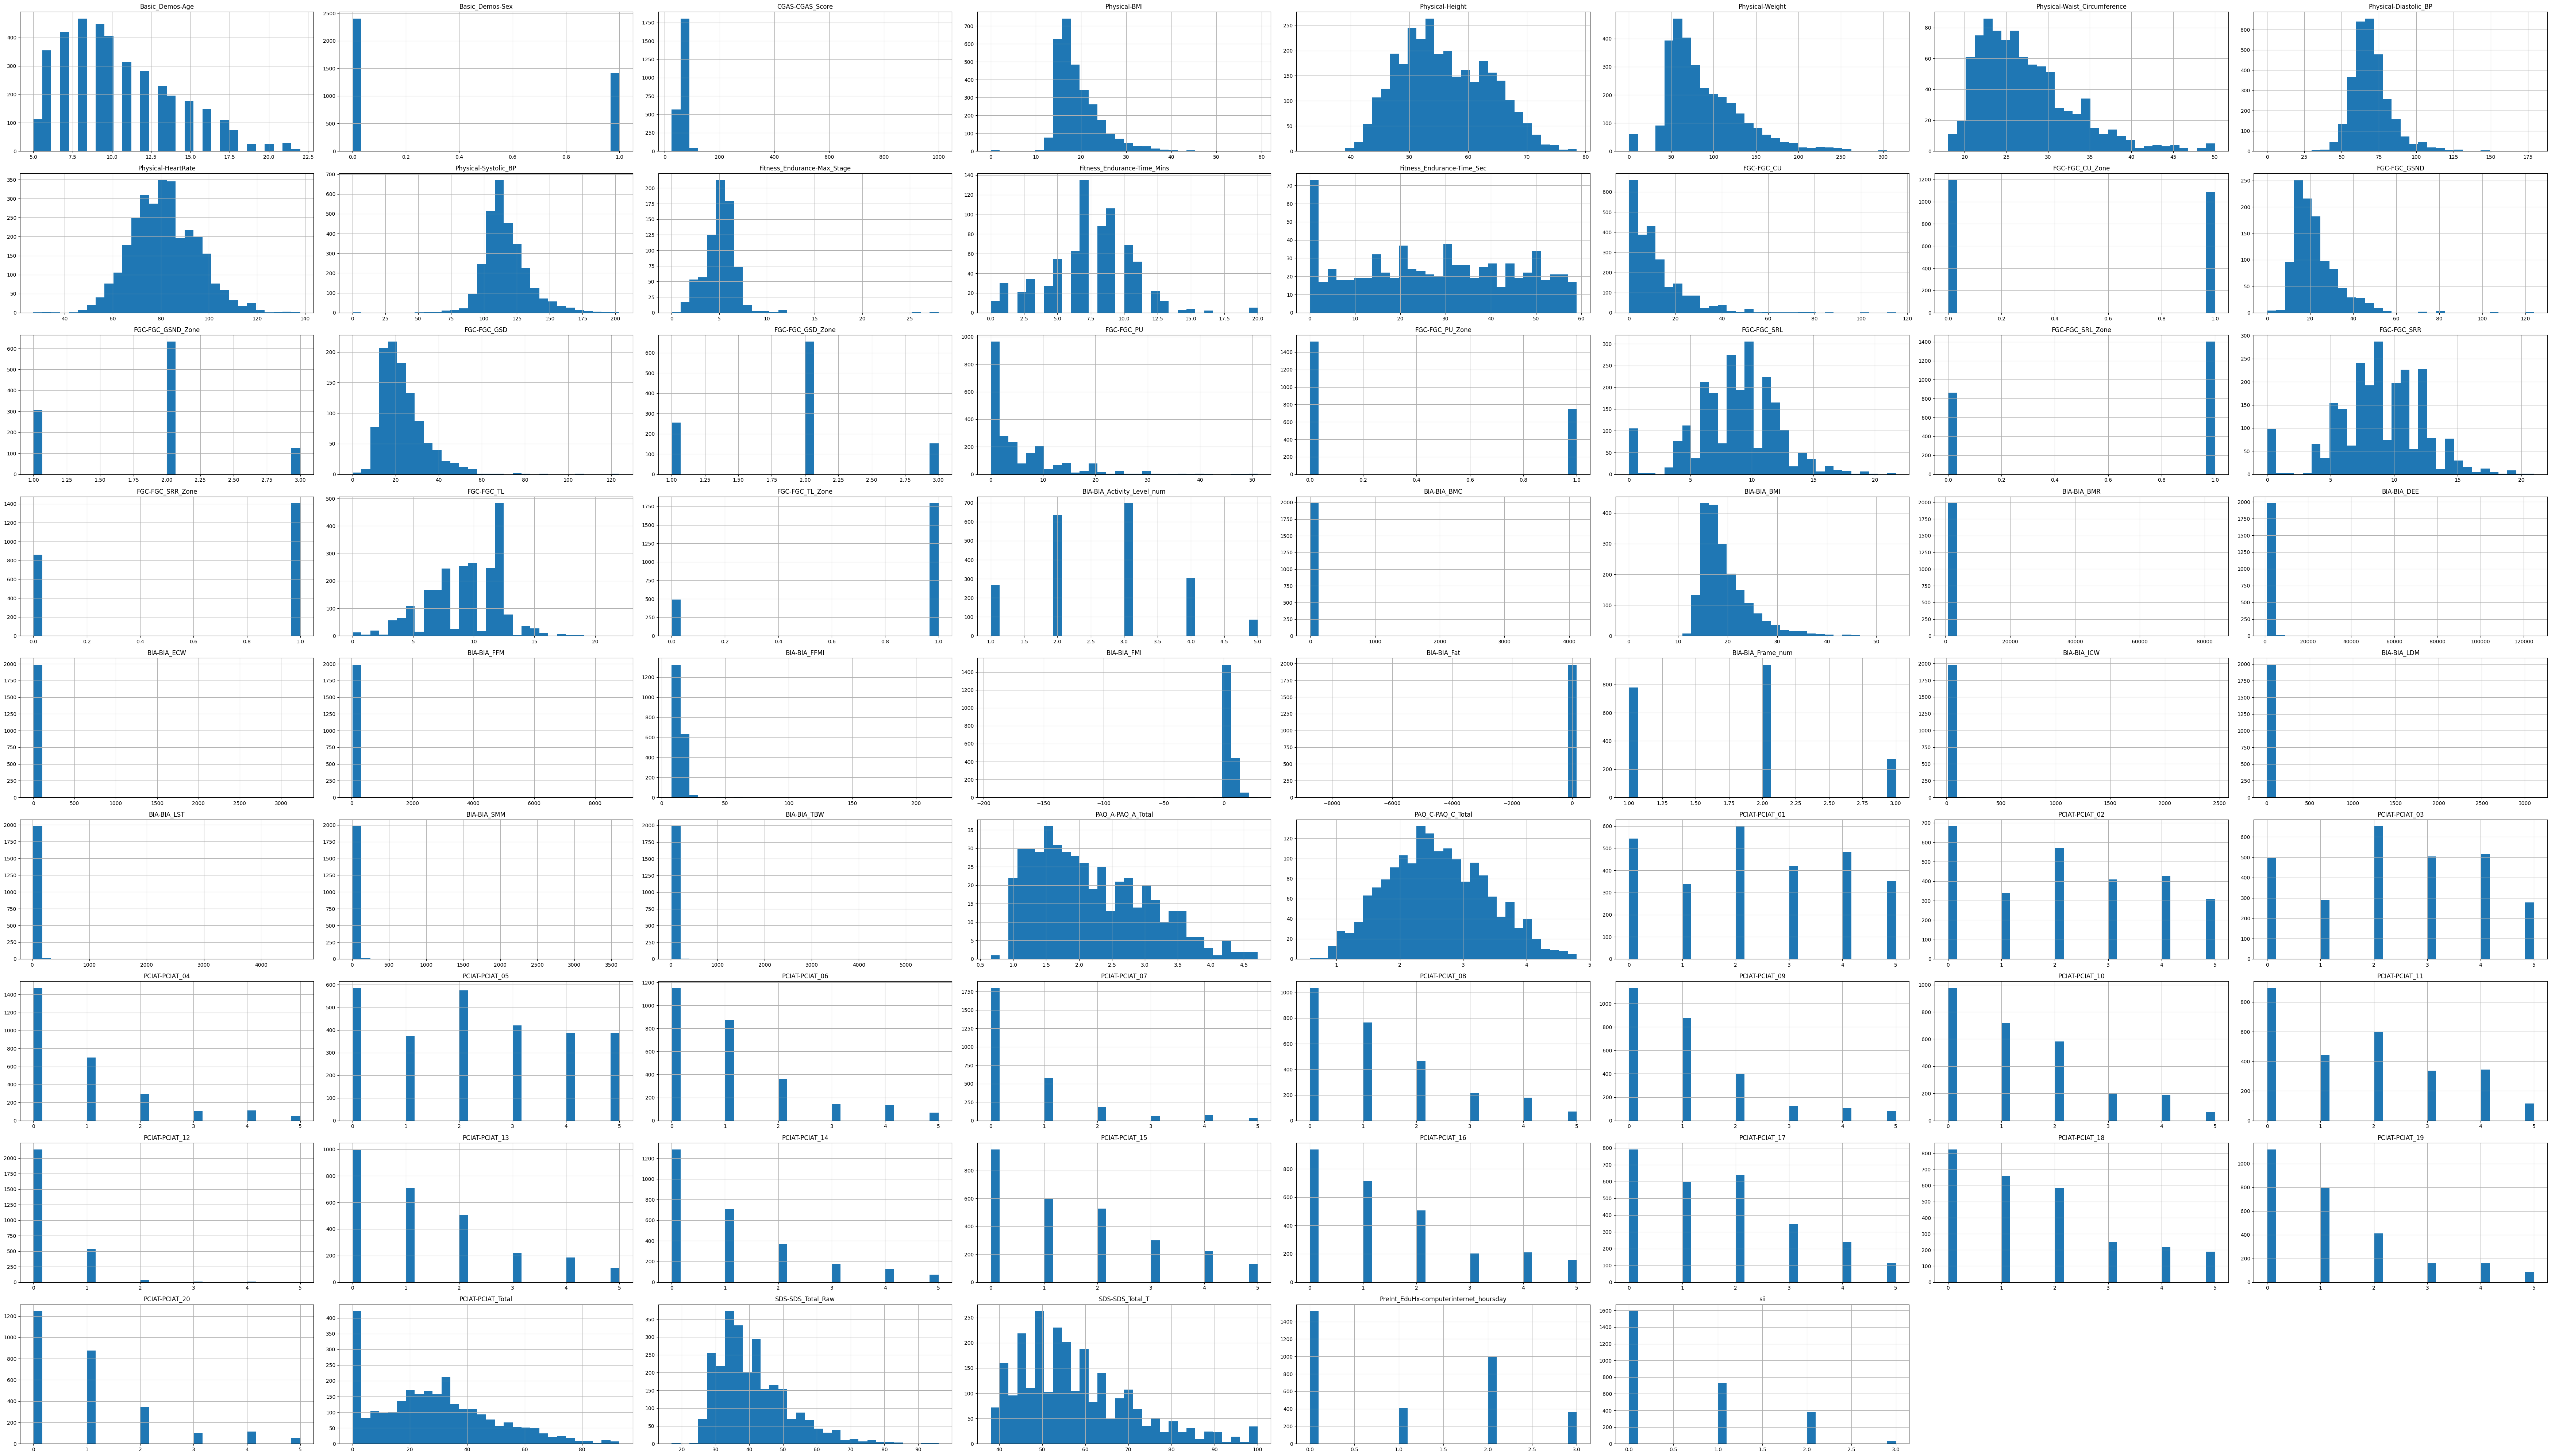

In [15]:
data.hist(figsize=(70, 40), bins=30)  
plt.tight_layout()  
plt.show()

## How internet usage affect physical measures 

### Average BMI , HeartRate , Blood pressure

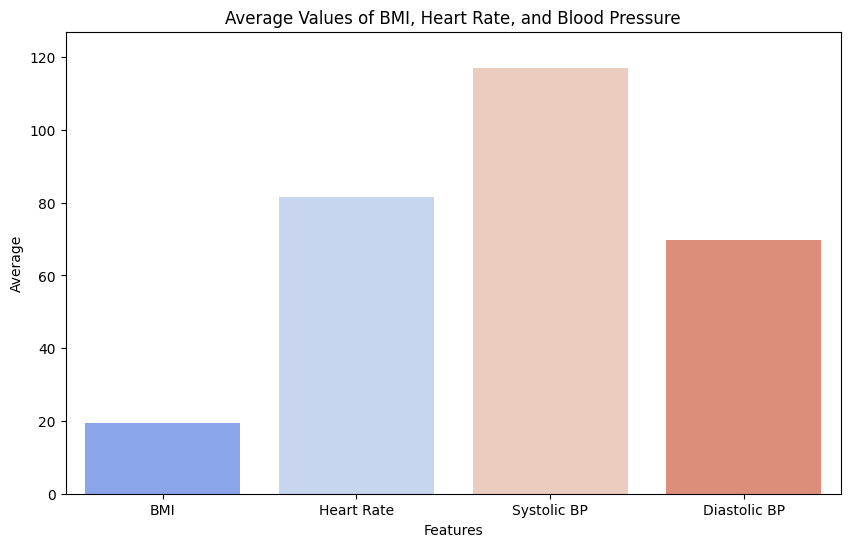

In [16]:
averages = {
    'BMI': data['Physical-BMI'].mean(),
    'Heart Rate': data['Physical-HeartRate'].mean(),
    'Systolic BP': data['Physical-Systolic_BP'].mean(),
    'Diastolic BP': data['Physical-Diastolic_BP'].mean()
}

# Convert to DataFrame for easier plotting
averages_df = pd.DataFrame(list(averages.items()), columns=['Feature', 'Average'])

# Step 2: Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Feature', y='Average', data=averages_df, palette='coolwarm')
plt.title('Average Values of BMI, Heart Rate, and Blood Pressure')
plt.ylabel('Average')
plt.xlabel('Features')
plt.ylim(0, averages_df['Average'].max() + 10)  # Adjusting y-axis for better visibility
plt.show()

### Childern Global Assessment Scale vs internet usage

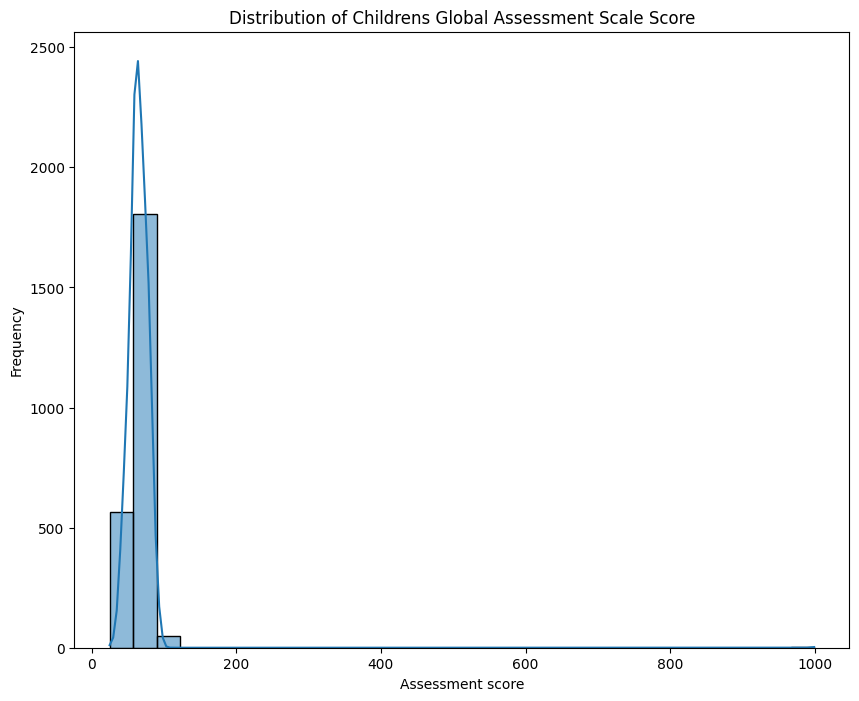

In [17]:
plt.figure(figsize=(10, 8))
sns.histplot(data['CGAS-CGAS_Score'], bins=30, kde=True)  
plt.title('Distribution of Childrens Global Assessment Scale Score')
plt.xlabel('Assessment score')
plt.ylabel('Frequency')
plt.show()

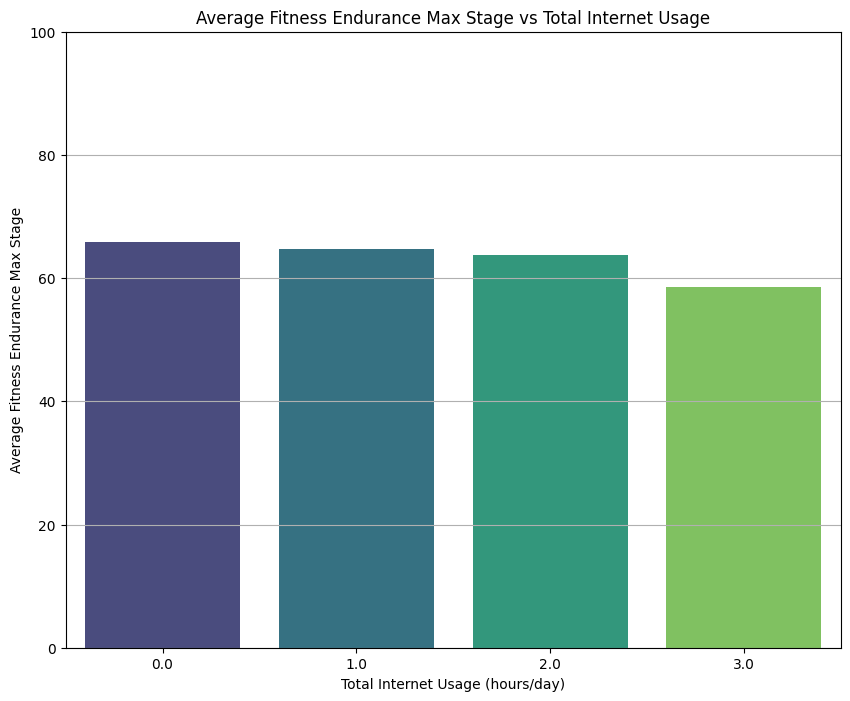

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame
mean_values = data.groupby('sii')['CGAS-CGAS_Score'].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(10, 8))
sns.barplot(x='sii', y='CGAS-CGAS_Score', data=mean_values, palette='viridis')

# Customize the plot
plt.title('Average Fitness Endurance Max Stage vs Total Internet Usage')
plt.xlabel('Total Internet Usage (hours/day)')
plt.ylabel('Average Fitness Endurance Max Stage')
plt.ylim(0, 100)  # Set y-axis limits from 0 to 100
plt.grid(axis='y')

plt.show()

### BMI vs SII Severity

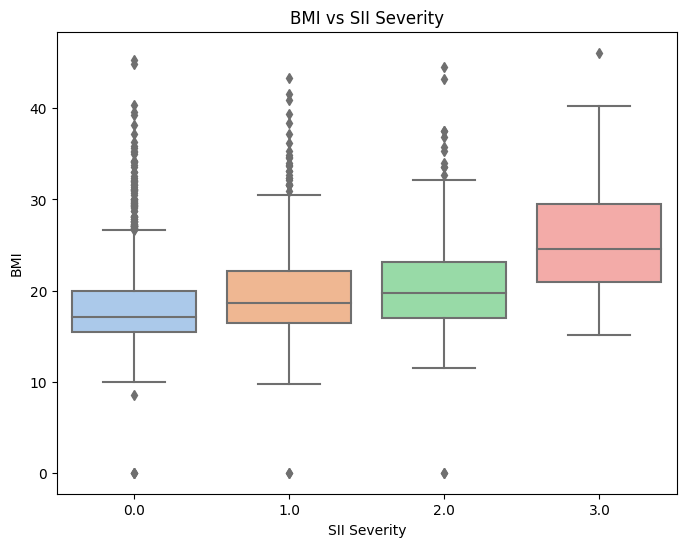

In [19]:
# Plot 1: BMI vs SII Severity
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='sii', y='Physical-BMI', palette='pastel')
plt.title('BMI vs SII Severity')
plt.xlabel('SII Severity')
plt.ylabel('BMI')
plt.show()

### Blood pressure vs internet Usage

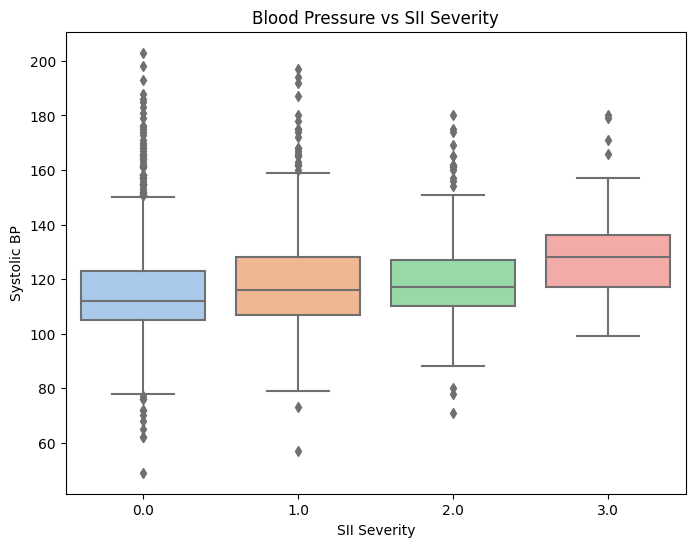

In [20]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='sii', y='Physical-Systolic_BP', palette='pastel')
plt.title('Blood Pressure vs SII Severity')
plt.xlabel('SII Severity')
plt.ylabel('Systolic BP')
plt.show()

### Heart rate vs internet usage

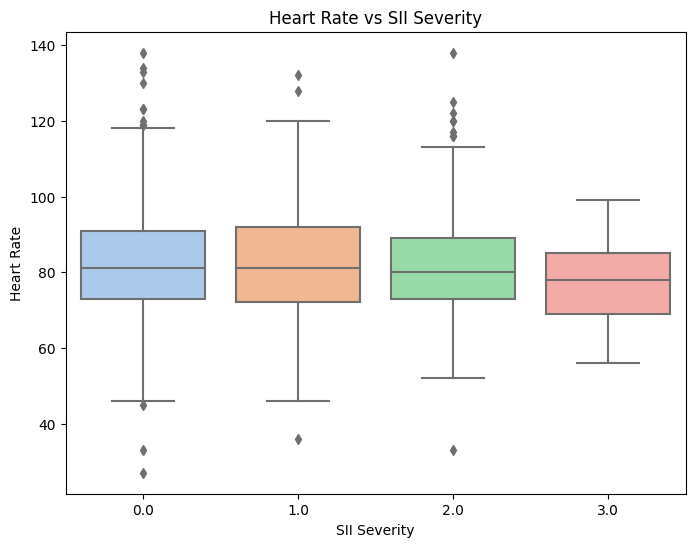

In [21]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='sii', y='Physical-HeartRate', palette='pastel')
plt.title('Heart Rate vs SII Severity')
plt.xlabel('SII Severity')
plt.ylabel('Heart Rate')
plt.show()

## Demographics influence  

### Age Distribution 

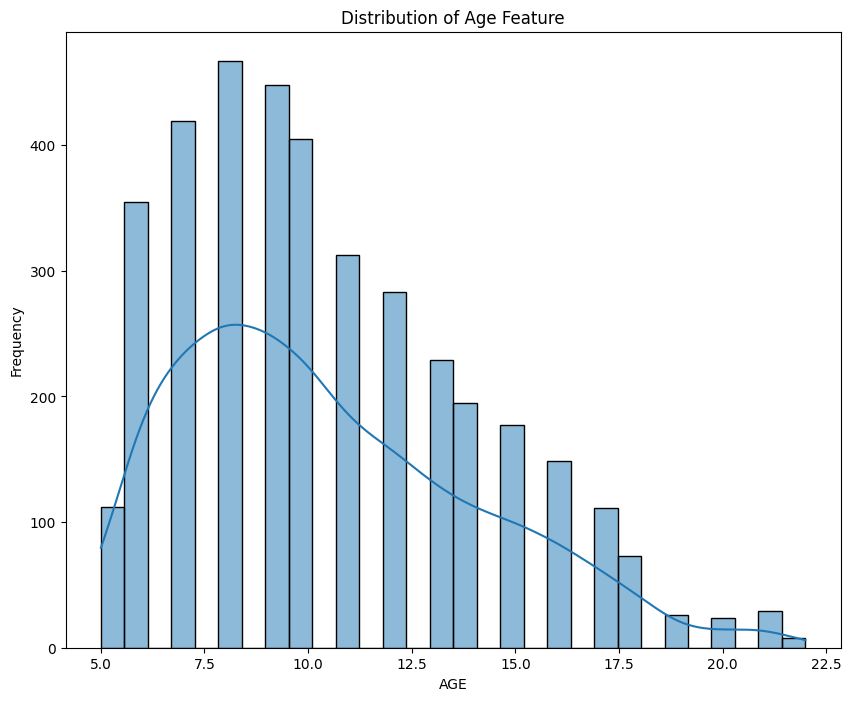

In [22]:
plt.figure(figsize=(10, 8))
sns.histplot(data['Basic_Demos-Age'], bins=30, kde=True)  
plt.title('Distribution of Age Feature')
plt.xlabel('AGE')
plt.ylabel('Frequency')
plt.show()

### Gender Distribution

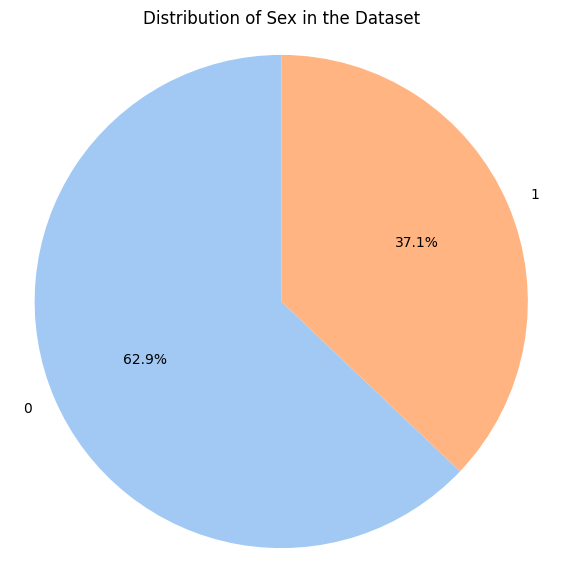

In [23]:
# Count the number of occurrences for each sex
Gende_counts = data['Basic_Demos-Sex'].value_counts()

# Create the pie chart
plt.figure(figsize=(7, 7))
plt.pie(Gende_counts, labels=Gende_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Distribution of Sex in the Dataset')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular
plt.show()
# 0-> male  1_> female

In [24]:
def categorize_severity(score):
    if score <= 30:
        return 'None'
    elif score <= 49:
        return 'Mild'
    elif score <= 79:
        return 'Moderate'
    else:
        return 'Severe'

data['Severity'] = data['PCIAT-PCIAT_Total'].apply(categorize_severity)

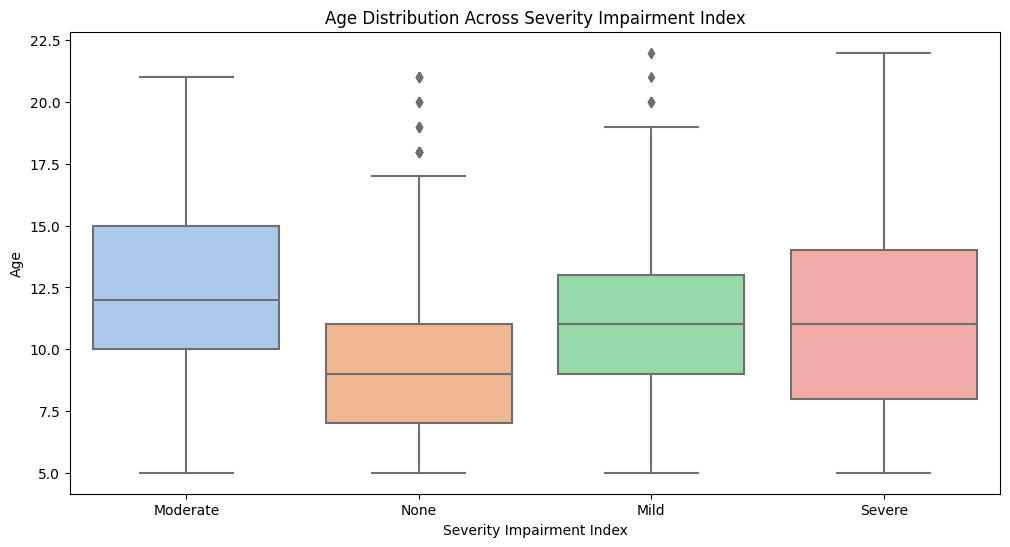

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(x='Severity', y='Basic_Demos-Age', data=data, palette='pastel')
plt.title('Age Distribution Across Severity Impairment Index')
plt.xlabel('Severity Impairment Index')
plt.ylabel('Age')
plt.show()



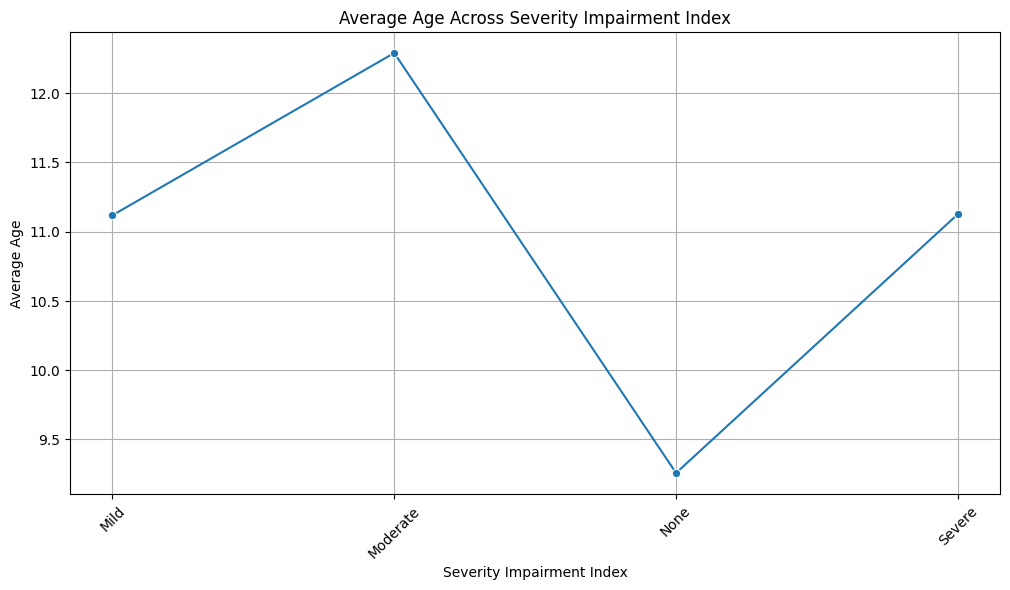

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the average age for each severity category
average_age = data.groupby('Severity')['Basic_Demos-Age'].mean().reset_index()

# Create a line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='Severity', y='Basic_Demos-Age', data=average_age, marker='o')
plt.title('Average Age Across Severity Impairment Index')
plt.xlabel('Severity Impairment Index')
plt.ylabel('Average Age')
plt.xticks(rotation=45)  # Rotate x labels for better visibility
plt.grid(True)  # Add grid for better readability
plt.show()


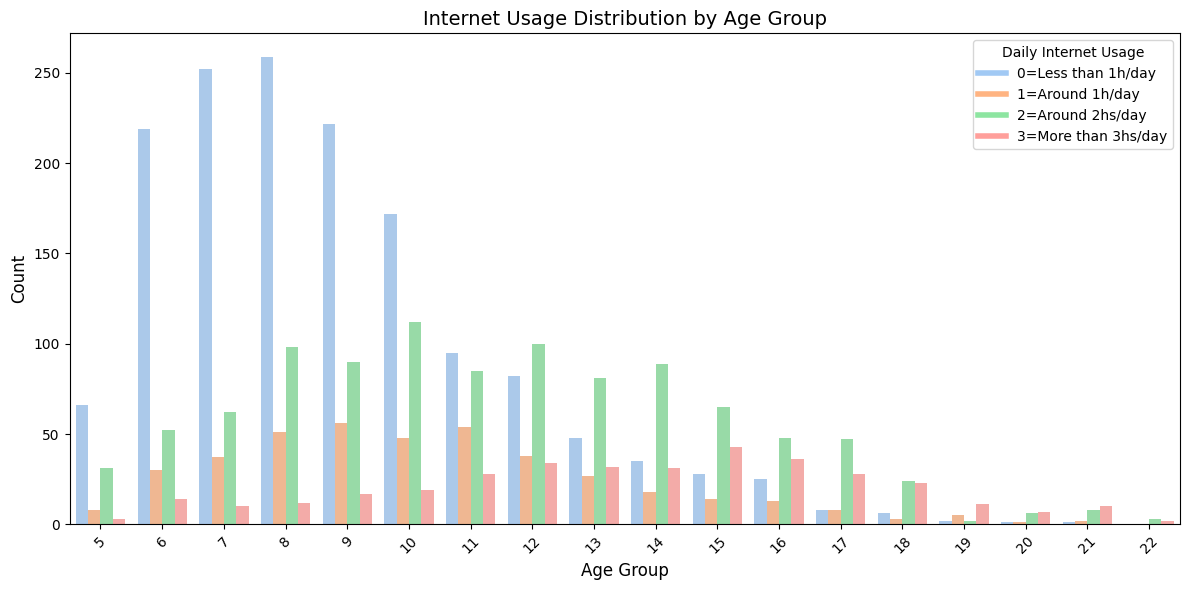

In [27]:

internet_usage = data.groupby(['Basic_Demos-Age', 'PreInt_EduHx-computerinternet_hoursday']).size().unstack(fill_value=0)

internet_usage = internet_usage.reset_index()

internet_usage_melted = internet_usage.melt(id_vars='Basic_Demos-Age', 
                                              var_name='Internet Usage', 
                                              value_name='Count')
plt.figure(figsize=(12, 6))
palette = sns.color_palette('pastel') 
sns.barplot(data=internet_usage_melted, 
            x='Basic_Demos-Age', 
            y='Count', 
            hue='Internet Usage', 
            palette=palette)

plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Internet Usage Distribution by Age Group', fontsize=14)
plt.xticks(rotation=45)

handles = []
for i, label in enumerate(['0=Less than 1h/day', '1=Around 1h/day', '2=Around 2hs/day', '3=More than 3hs/day']):
    handles.append(plt.Line2D([0], [0], color=palette[i], lw=4))  # Create a line for each color

plt.legend(handles, 
           ['0=Less than 1h/day', '1=Around 1h/day', '2=Around 2hs/day', '3=More than 3hs/day'], 
           title='Daily Internet Usage')

plt.tight_layout() 
plt.show()


## Sleep Quality vs internet usage

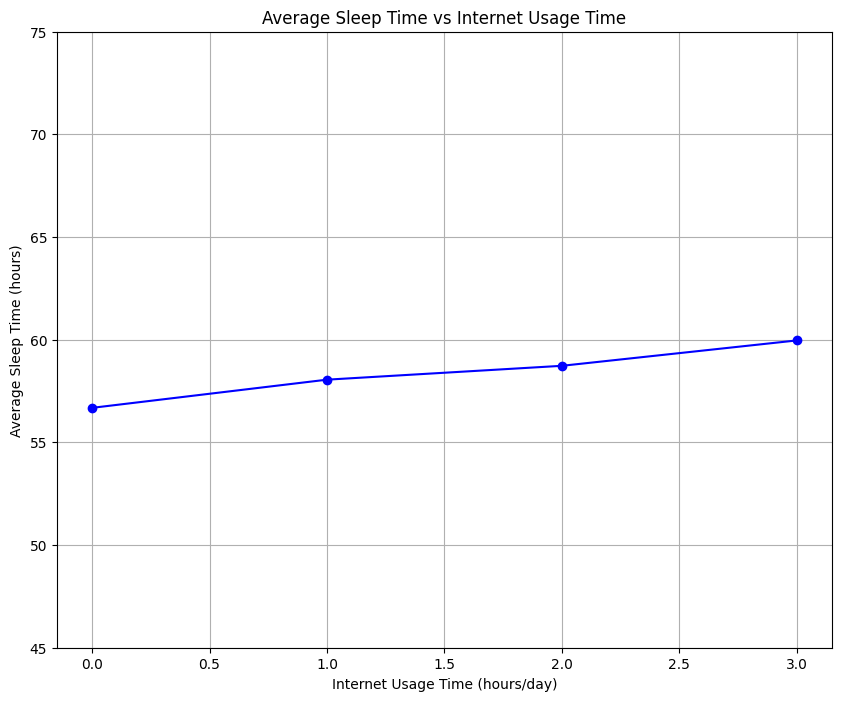

In [28]:
mean_sleep_time = data.groupby('PreInt_EduHx-computerinternet_hoursday')['SDS-SDS_Total_T'].mean()

plt.figure(figsize=(10, 8))
plt.plot(mean_sleep_time.index, mean_sleep_time.values, marker='o', linestyle='-', color='blue')

# Customize the plot
plt.xlabel('Internet Usage Time (hours/day)')
plt.ylabel('Average Sleep Time (hours)')
plt.title('Average Sleep Time vs Internet Usage Time')

custom_ticks = [ 45, 50, 55, 60, 65, 70,75]  # Define your custom tick values
plt.yticks(custom_ticks)

plt.grid(True)

# Show the plot
plt.show()



## Behavioural influence 

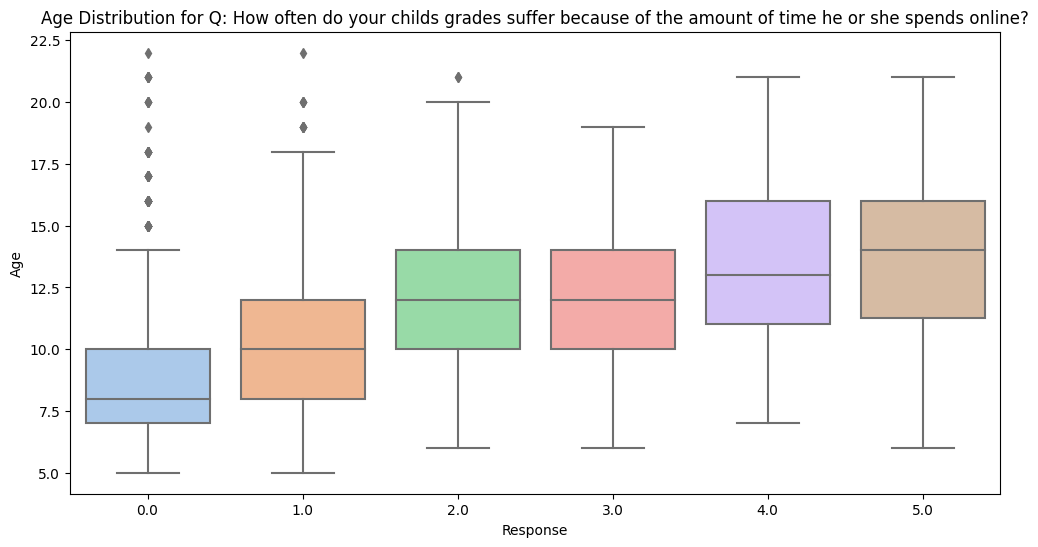

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(12, 6))
sns.boxplot(x='PCIAT-PCIAT_06', y='Basic_Demos-Age', data=data, palette='pastel')
plt.title('Age Distribution for Q: How often do your childs grades suffer because of the amount of time he or she spends online?')
plt.xlabel('Response')
plt.ylabel('Age')
plt.show()


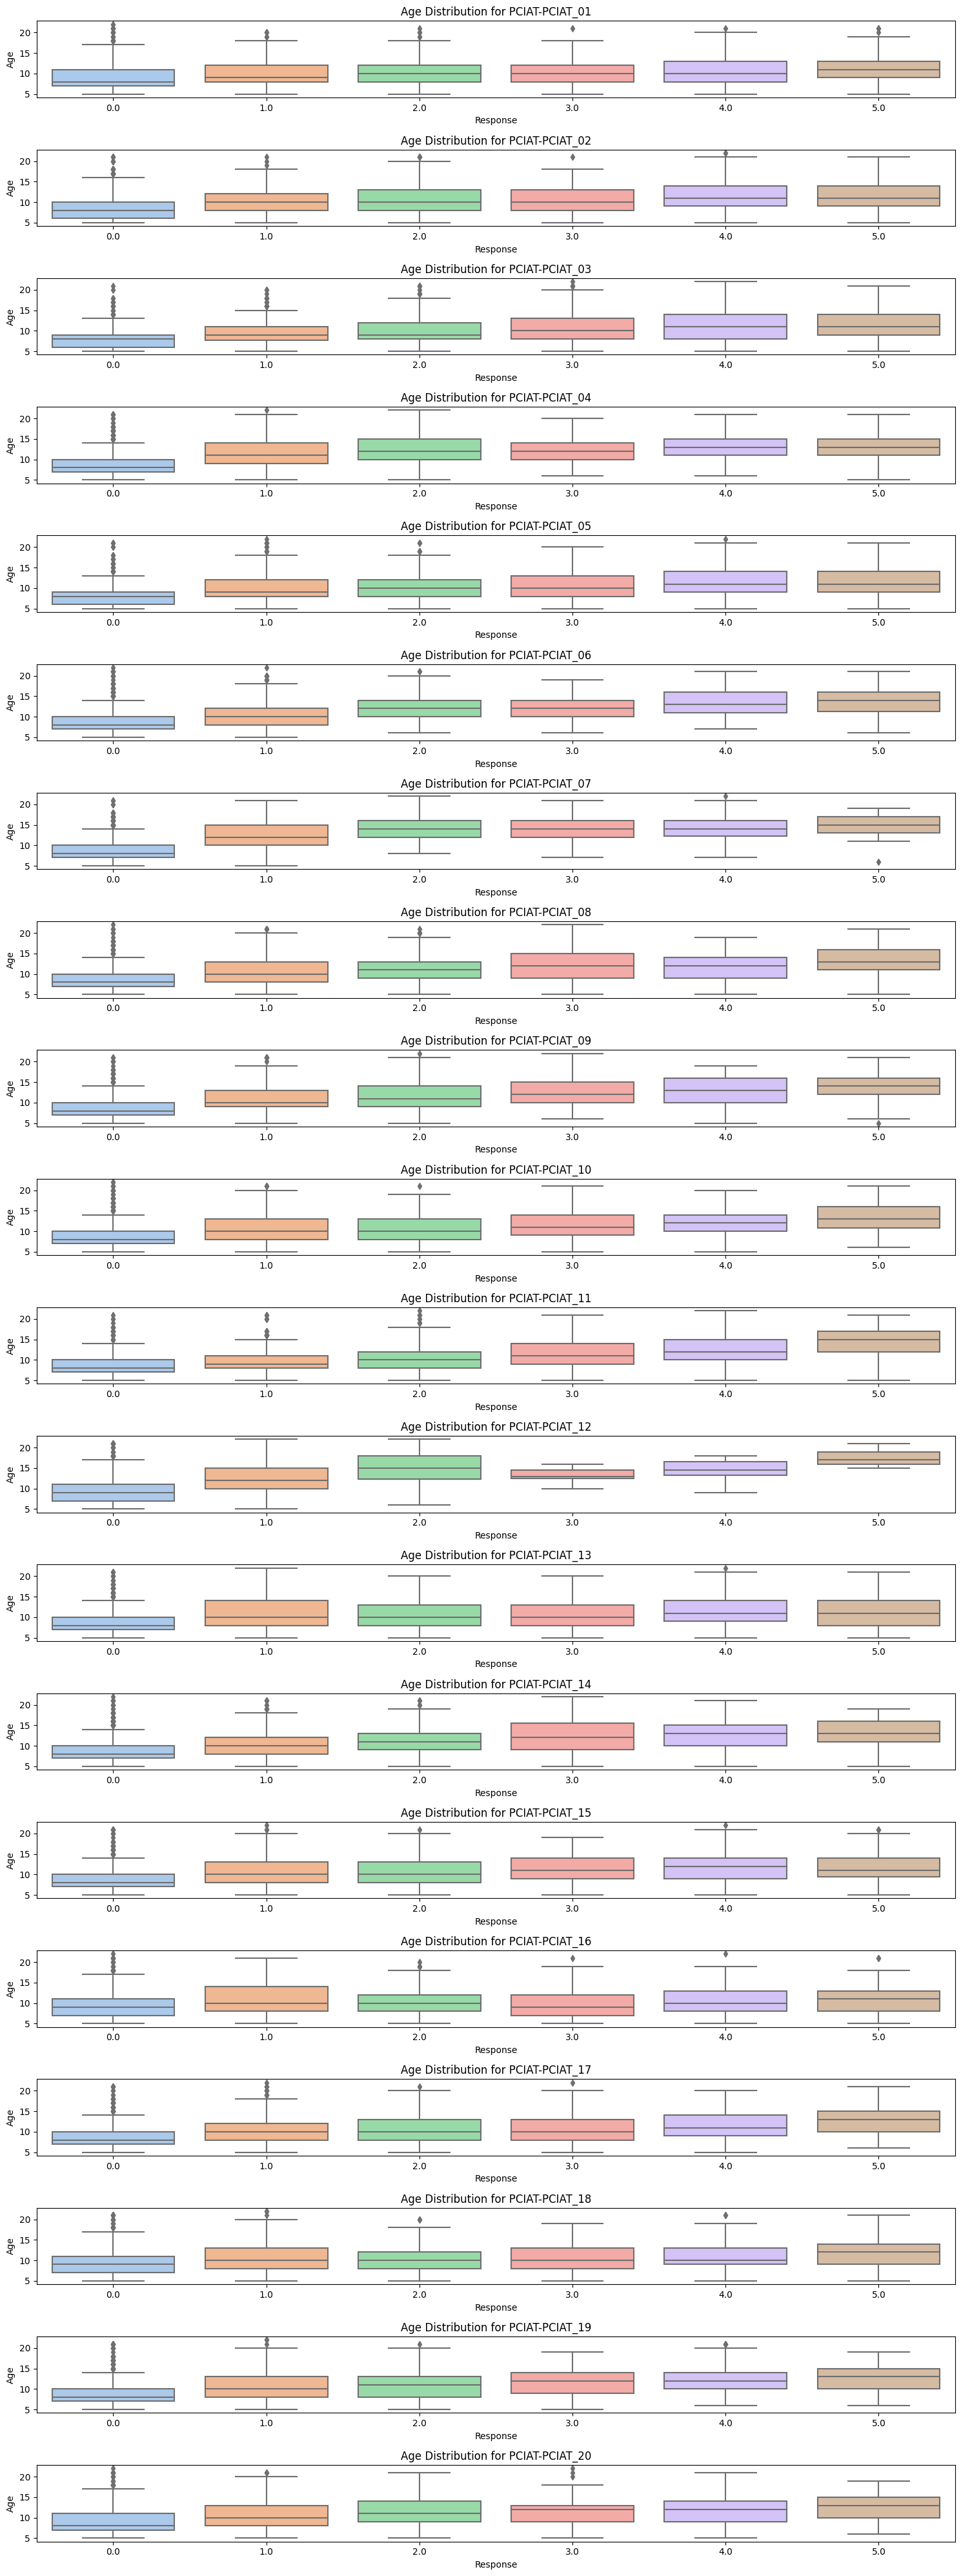

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of questions to analyze
questions = [
    'PCIAT-PCIAT_01', 'PCIAT-PCIAT_02', 'PCIAT-PCIAT_03', 
    'PCIAT-PCIAT_04', 'PCIAT-PCIAT_05', 'PCIAT-PCIAT_06',
    'PCIAT-PCIAT_07', 'PCIAT-PCIAT_08', 'PCIAT-PCIAT_09',
    'PCIAT-PCIAT_10', 'PCIAT-PCIAT_11', 'PCIAT-PCIAT_12',
    'PCIAT-PCIAT_13', 'PCIAT-PCIAT_14', 'PCIAT-PCIAT_15',
    'PCIAT-PCIAT_16', 'PCIAT-PCIAT_17', 'PCIAT-PCIAT_18',
    'PCIAT-PCIAT_19', 'PCIAT-PCIAT_20'
]

plt.figure(figsize=(15, 40))  # Adjust the size for better visibility

# Create a box plot for each question
for i, question in enumerate(questions):
    plt.subplot(len(questions), 1, i + 1)  # Create subplots
    sns.boxplot(x=question, y='Basic_Demos-Age', data=data, palette='pastel')
    plt.title(f'Age Distribution for {question}')
    plt.xlabel('Response')
    plt.ylabel('Age')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


# Data Cleaning

## Handling Missing Values 

### Drop columns with null>50

In [31]:

col = ['CGAS-Season', 'Physical-Season', 'Fitness_Endurance-Season', 
       'FGC-Season', 'BIA-Season', 'PAQ_A-Season', 'PAQ_C-Season',
       'PCIAT-Season', 'SDS-Season', 'PreInt_EduHx-Season']
col.extend( 
        ['Physical-Waist_Circumference','Fitness_Endurance-Max_Stage',
         'Fitness_Endurance-Time_Mins','Fitness_Endurance-Time_Sec','FGC-FGC_GSND',
         'FGC-FGC_GSND_Zone','FGC-FGC_GSD','FGC-FGC_GSD_Zone','BIA-BIA_Activity_Level_num',
         'BIA-BIA_BMC','BIA-BIA_BMI','BIA-BIA_BMR','BIA-BIA_DEE','BIA-BIA_ECW','BIA-BIA_FFM',
         'BIA-BIA_FFMI','BIA-BIA_Fat','BIA-BIA_Frame_num','BIA-BIA_ICW','BIA-BIA_LDM','BIA-BIA_LST',
         'BIA-BIA_SMM','BIA-BIA_TBW','PAQ_A-PAQ_A_Total','PAQ_C-PAQ_C_Total'])
len(col)

35

In [32]:
data.drop(col , axis =1 ,inplace=True)

In [33]:
data.shape

(3823, 47)

In [34]:
data_cleaned= data.copy()

In [35]:
data_cleaned.shape

(3823, 47)

### Filling Missing Values in first 46 columns with Knn imputer

In [36]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data_cleaned['Basic_Demos-Enroll_Season'] = label_encoder.fit_transform(data_cleaned['Basic_Demos-Enroll_Season'])

In [37]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
data_cleaned.iloc[:, :45] = imputer.fit_transform(data_cleaned.iloc[:, :45])

In [38]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data_cleaned['Severity'] = label_encoder.fit_transform(data_cleaned['Severity'])

### Filling missing values in target with Kmeans

In [39]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd

def impute_with_kmeans(df, categorical_columns, n_clusters=4):
    # Fill missing values temporarily with the mode (or any placeholder)
    df_temp = df.copy()
    for col in categorical_columns:
        df_temp[col].fillna(df_temp[col].mode()[0], inplace=True)

    # Perform KMeans clustering after filling missing values
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(df_temp)

    # Impute missing values within each cluster
    for col in categorical_columns:
        for cluster in np.unique(cluster_labels):
            mask = (cluster_labels == cluster) & df[col].isna()
            most_frequent = df.loc[cluster_labels == cluster, col].mode()[0]
            df.loc[mask, col] = most_frequent

    return df

# Apply KMeans-based imputation
data_cleaned = impute_with_kmeans(data_cleaned, ['sii'])

In [40]:
data_cleaned['sii'].value_counts()

sii
0.0    2533
1.0     878
2.0     378
3.0      34
Name: count, dtype: int64

In [41]:
data_cleaned.head()

,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-CGAS_Score,Physical-BMI,Physical-Height,Physical-Weight,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,FGC-FGC_CU,FGC-FGC_CU_Zone,FGC-FGC_PU,FGC-FGC_PU_Zone,FGC-FGC_SRL,FGC-FGC_SRL_Zone,FGC-FGC_SRR,FGC-FGC_SRR_Zone,FGC-FGC_TL,FGC-FGC_TL_Zone,BIA-BIA_FMI,PCIAT-PCIAT_01,PCIAT-PCIAT_02,PCIAT-PCIAT_03,PCIAT-PCIAT_04,PCIAT-PCIAT_05,PCIAT-PCIAT_06,PCIAT-PCIAT_07,PCIAT-PCIAT_08,PCIAT-PCIAT_09,PCIAT-PCIAT_10,PCIAT-PCIAT_11,PCIAT-PCIAT_12,PCIAT-PCIAT_13,PCIAT-PCIAT_14,PCIAT-PCIAT_15,PCIAT-PCIAT_16,PCIAT-PCIAT_17,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-computerinternet_hoursday,sii,Severity
0,0,5,0,51.0,16.877316,46.000,50.80,59.0,86.0,114.2,0.0,0.0,0.0,0.0,7.0,0.0,6.0,0.0,6.0,1.0,3.061430,5.0,4.0,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,4.0,0.0,4.0,4.0,4.0,4.0,4.0,4.0,2.0,4.0,55.0,49.6,63.8,3.0,2.0,1
1,2,9,0,61.2,14.035590,48.000,46.00,75.0,70.0,122.0,3.0,0.0,5.0,0.0,11.0,1.0,11.0,1.0,3.0,0.0,1.211720,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46.0,64.0,0.0,0.0,2
2,2,10,1,71.0,16.648696,56.500,75.60,65.0,94.0,117.0,20.0,1.0,7.0,1.0,10.0,1.0,10.0,1.0,5.0,0.0,4.265620,5.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,2.0,1.0,1.0,28.0,38.0,54.0,2.0,0.0,2
3,3,9,0,71.0,18.292347,56.000,81.60,60.0,97.0,117.0,18.0,1.0,5.0,0.0,7.0,0.0,7.0,0.0,7.0,1.0,4.220330,4.0,2.0,4.0,0.0,5.0,1.0,0.0,3.0,2.0,2.0,3.0,0.0,3.0,0.0,0.0,3.0,4.0,3.0,4.0,1.0,44.0,31.0,45.0,0.0,1.0,0
4,1,18,1,64.4,23.883211,64.764,128.04,87.2,81.2,120.4,27.2,0.4,8.6,0.4,9.0,0.8,9.6,0.6,11.5,0.6,8.503348,1.2,1.6,1.6,1.2,1.4,1.0,1.8,1.0,1.0,0.8,2.0,0.2,0.8,0.8,0.8,0.8,1.0,1.0,0.8,0.6,21.4,40.4,57.0,2.8,0.0,3


In [42]:
data_cleaned.isnull().sum()

Basic_Demos-Enroll_Season                 0
Basic_Demos-Age                           0
Basic_Demos-Sex                           0
CGAS-CGAS_Score                           0
Physical-BMI                              0
Physical-Height                           0
Physical-Weight                           0
Physical-Diastolic_BP                     0
Physical-HeartRate                        0
Physical-Systolic_BP                      0
FGC-FGC_CU                                0
FGC-FGC_CU_Zone                           0
FGC-FGC_PU                                0
FGC-FGC_PU_Zone                           0
FGC-FGC_SRL                               0
FGC-FGC_SRL_Zone                          0
FGC-FGC_SRR                               0
FGC-FGC_SRR_Zone                          0
FGC-FGC_TL                                0
FGC-FGC_TL_Zone                           0
BIA-BIA_FMI                               0
PCIAT-PCIAT_01                            0
PCIAT-PCIAT_02                  

## Handling outliers 

In [43]:
outlier_indices = detect_outliers_iqr(data_cleaned)
print("Total outliers detected:", len(set(outlier_indices)))

Outliers in Basic_Demos-Enroll_Season: 0
Outliers in Basic_Demos-Age: 37
Outliers in Basic_Demos-Sex: 0
Outliers in CGAS-CGAS_Score: 188
Outliers in Physical-BMI: 189
Outliers in Physical-Height: 1
Outliers in Physical-Weight: 78
Outliers in Physical-Diastolic_BP: 170
Outliers in Physical-HeartRate: 72
Outliers in Physical-Systolic_BP: 187
Outliers in FGC-FGC_CU: 122
Outliers in FGC-FGC_CU_Zone: 0
Outliers in FGC-FGC_PU: 190
Outliers in FGC-FGC_PU_Zone: 0
Outliers in FGC-FGC_SRL: 140
Outliers in FGC-FGC_SRL_Zone: 0
Outliers in FGC-FGC_SRR: 135
Outliers in FGC-FGC_SRR_Zone: 0
Outliers in FGC-FGC_TL: 53
Outliers in FGC-FGC_TL_Zone: 557
Outliers in BIA-BIA_FMI: 198
Outliers in PCIAT-PCIAT_01: 0
Outliers in PCIAT-PCIAT_02: 0
Outliers in PCIAT-PCIAT_03: 0
Outliers in PCIAT-PCIAT_04: 164
Outliers in PCIAT-PCIAT_05: 0
Outliers in PCIAT-PCIAT_06: 70
Outliers in PCIAT-PCIAT_07: 200
Outliers in PCIAT-PCIAT_08: 0
Outliers in PCIAT-PCIAT_09: 84
Outliers in PCIAT-PCIAT_10: 0
Outliers in PCIAT-PCIAT

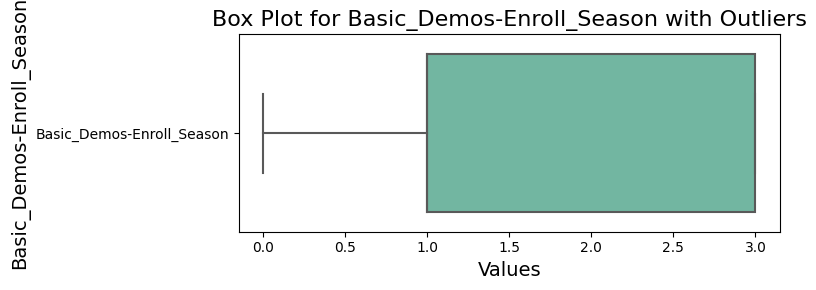

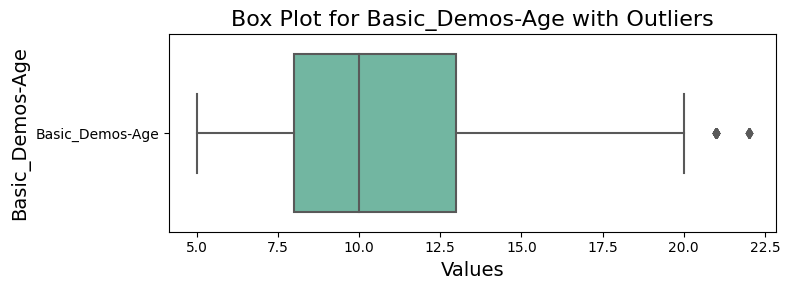

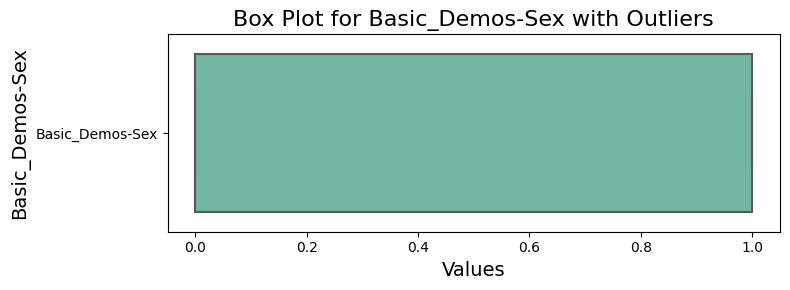

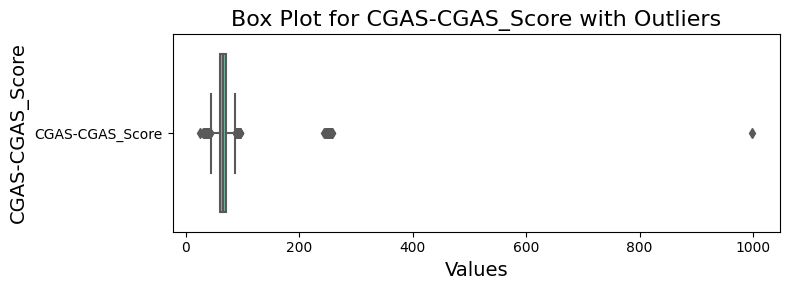

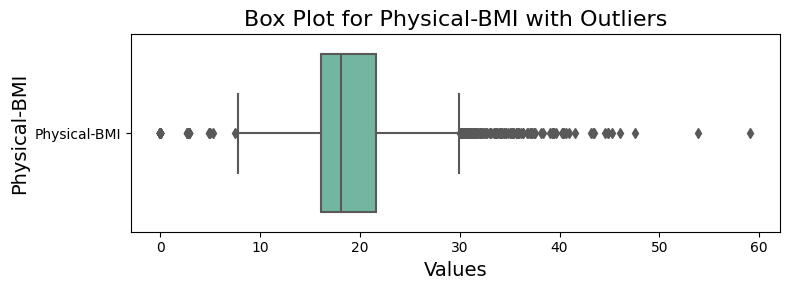

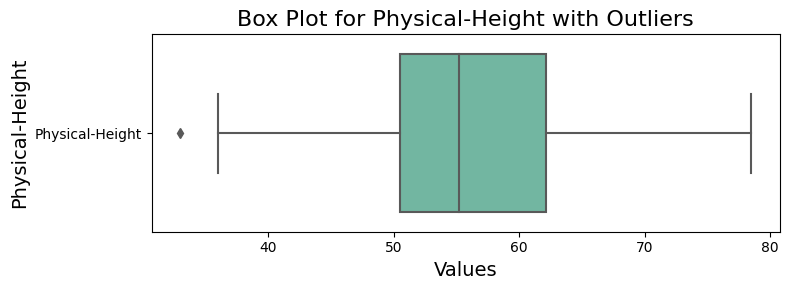

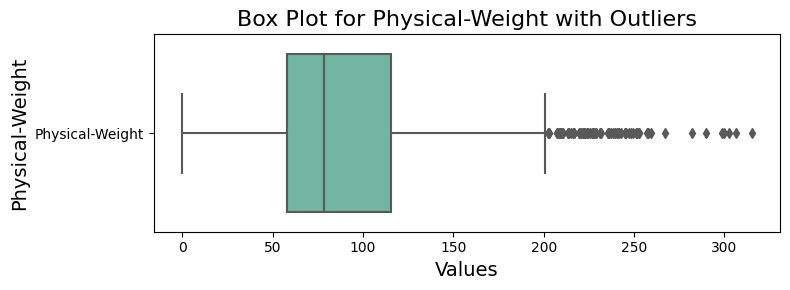

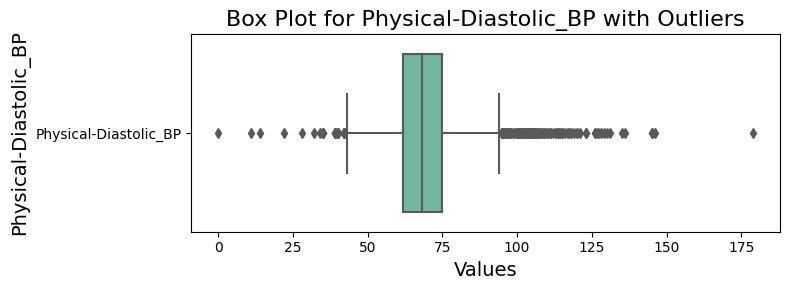

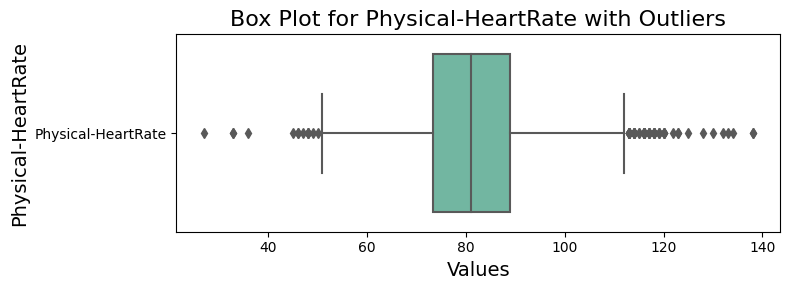

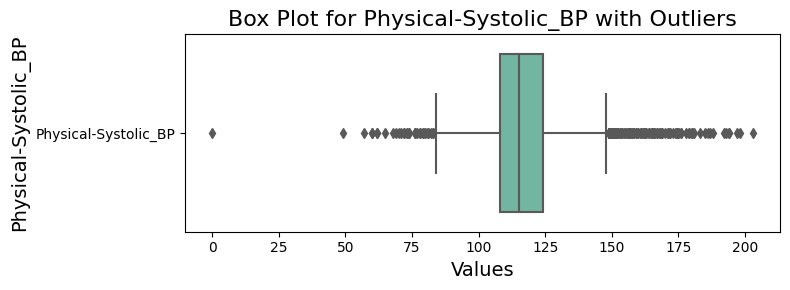

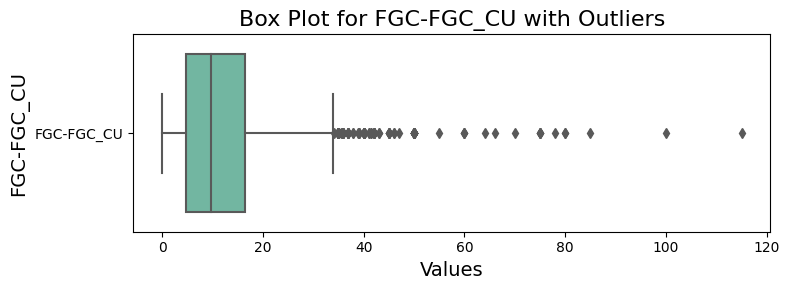

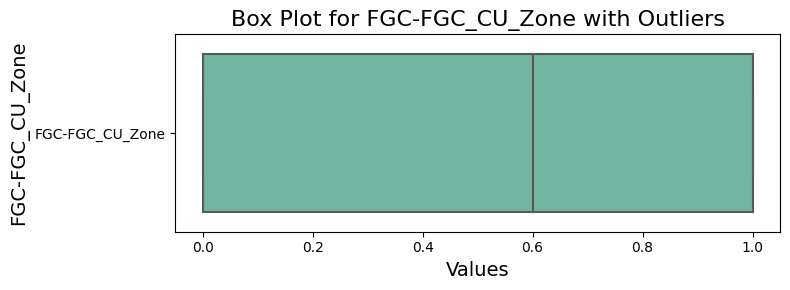

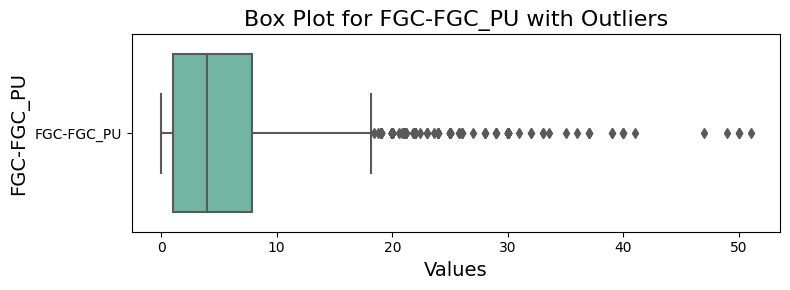

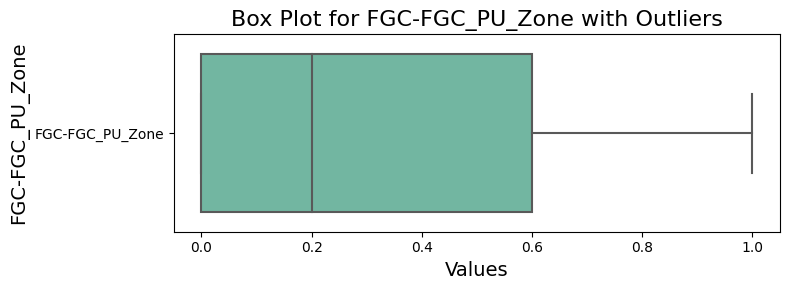

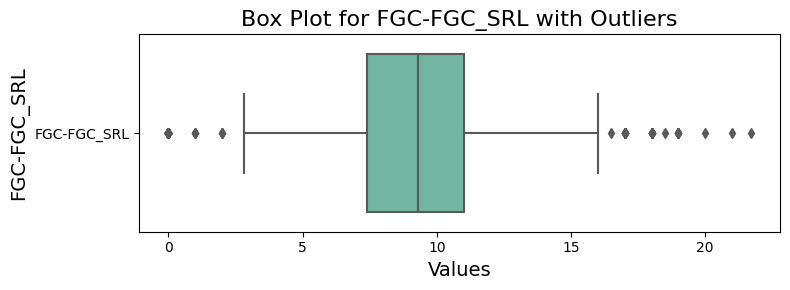

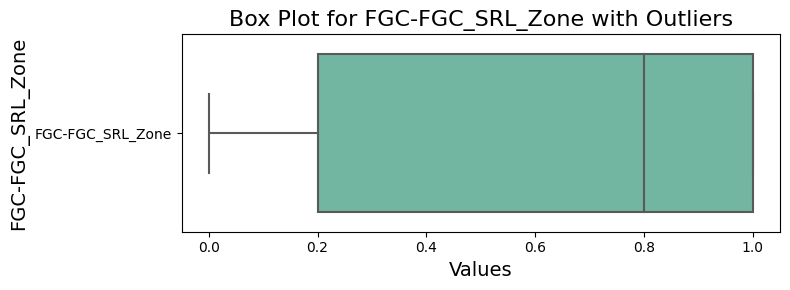

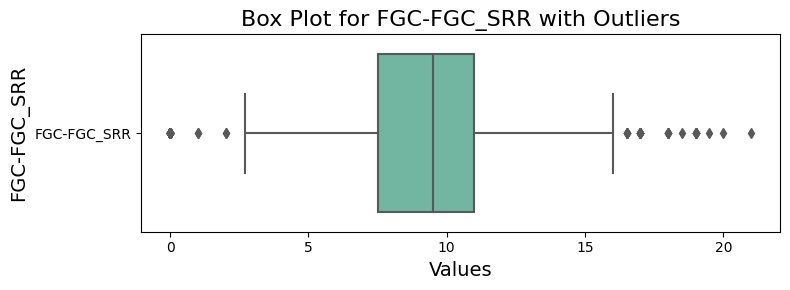

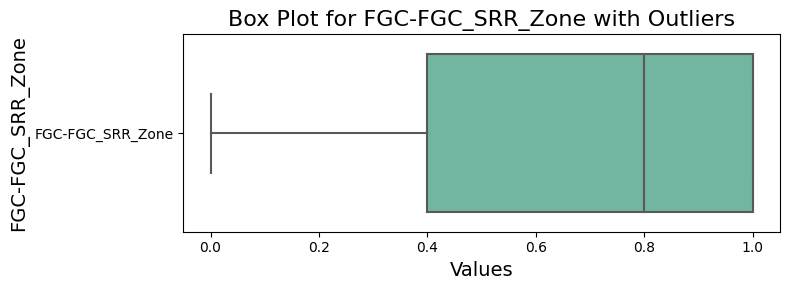

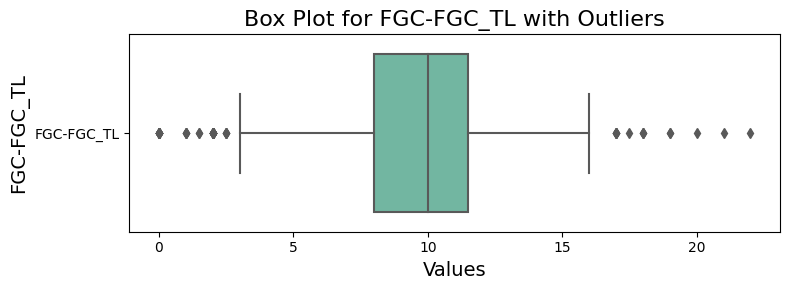

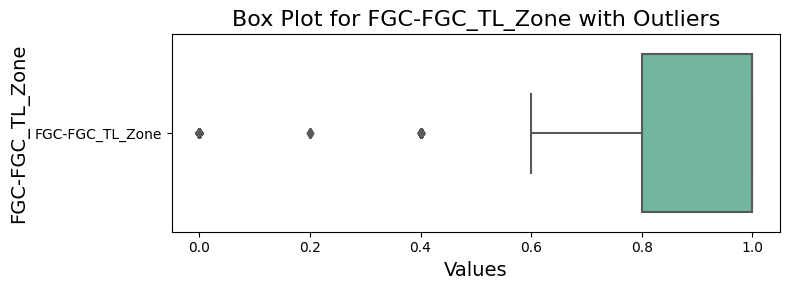

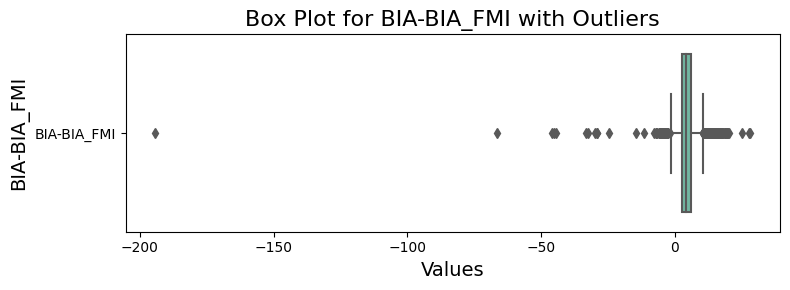

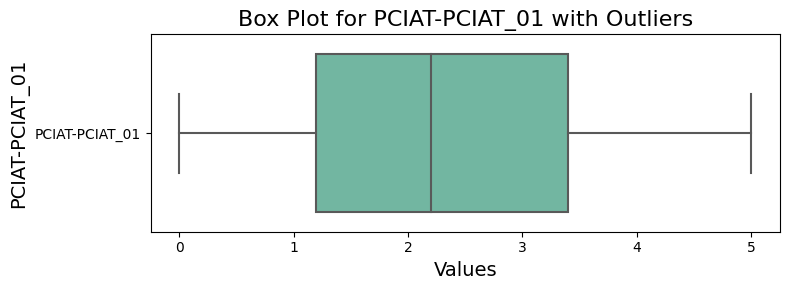

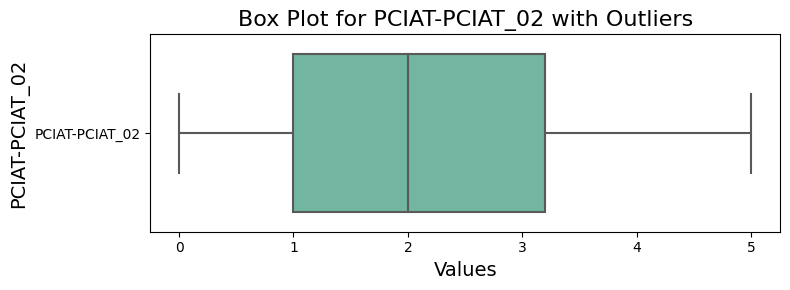

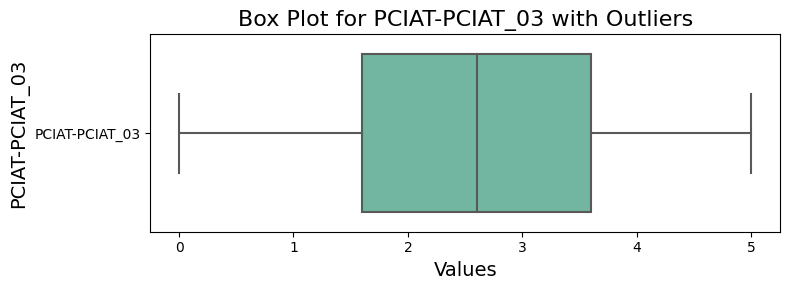

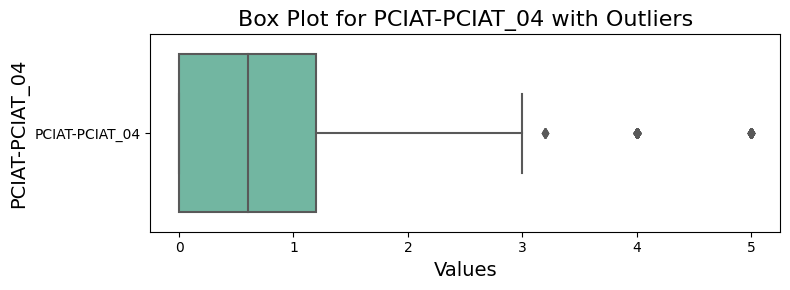

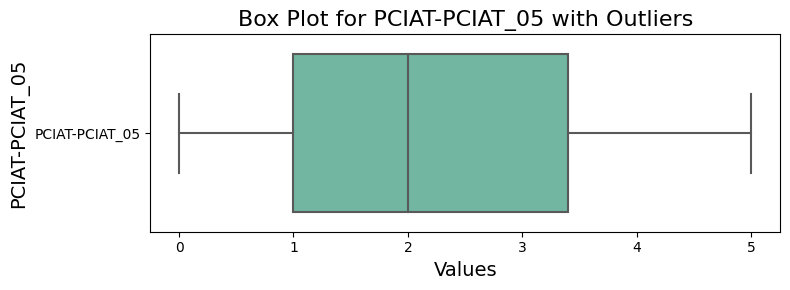

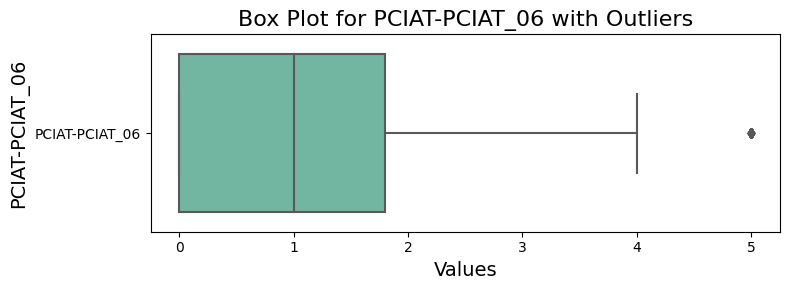

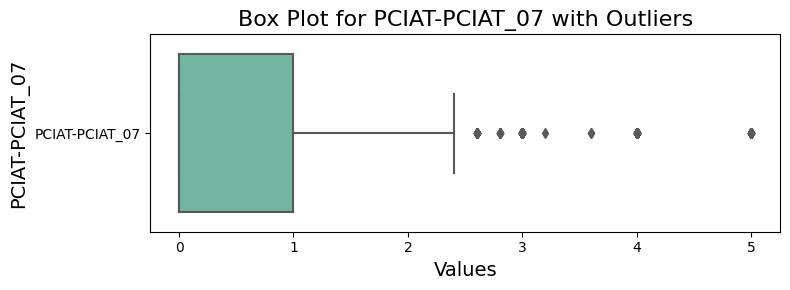

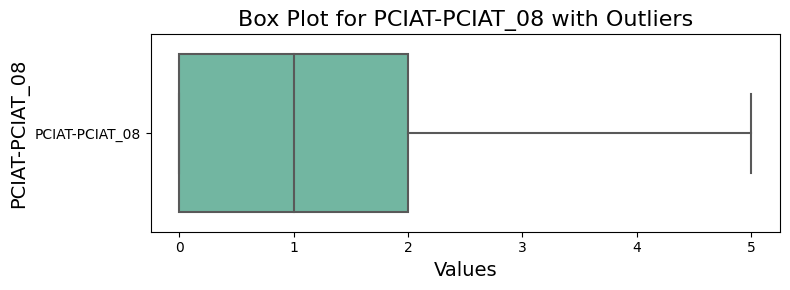

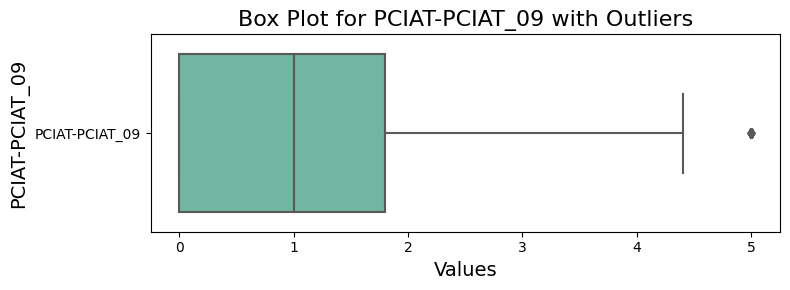

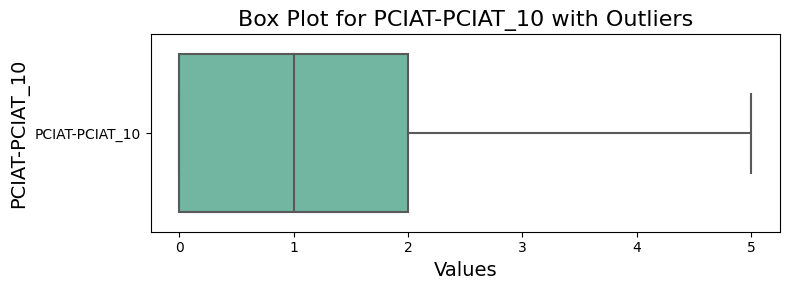

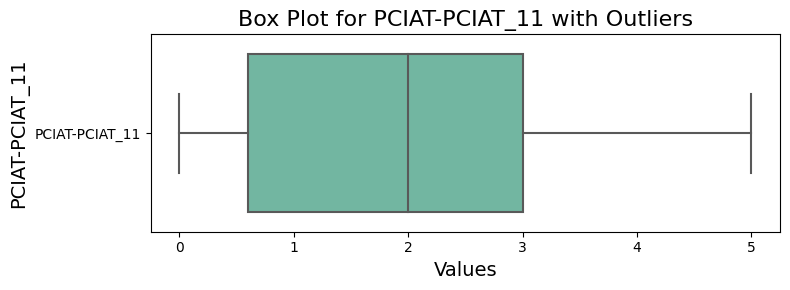

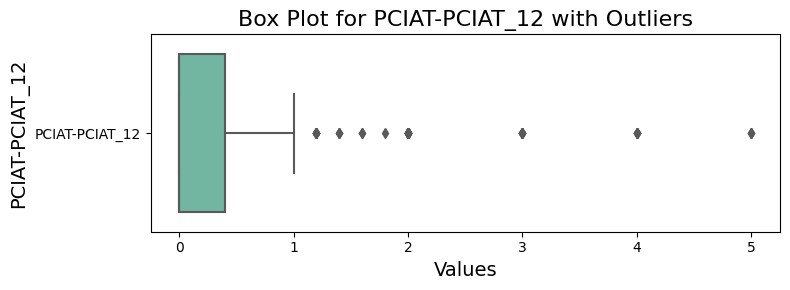

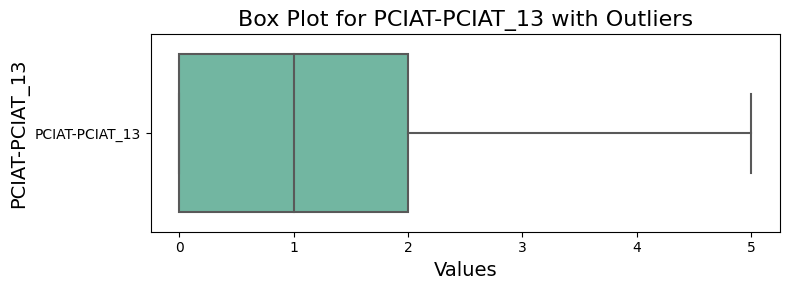

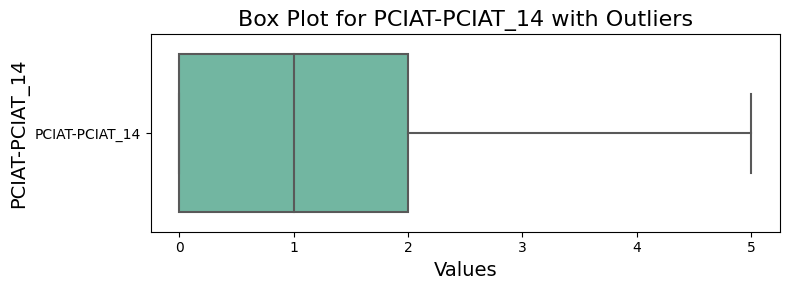

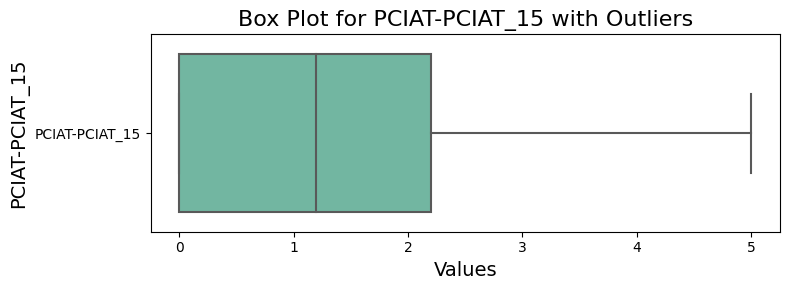

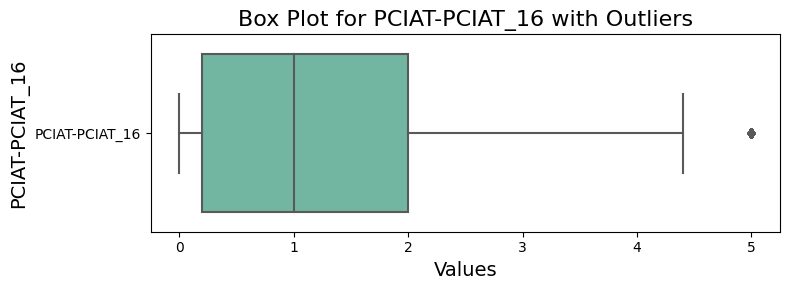

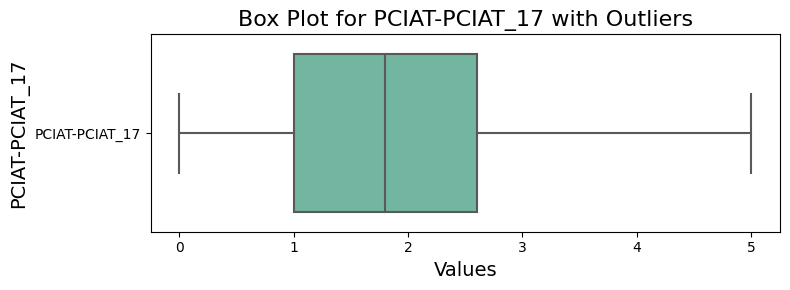

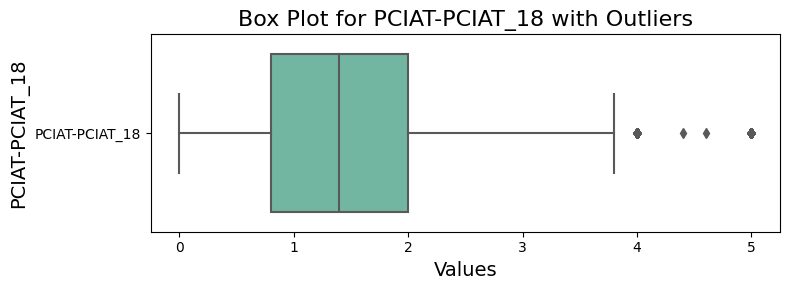

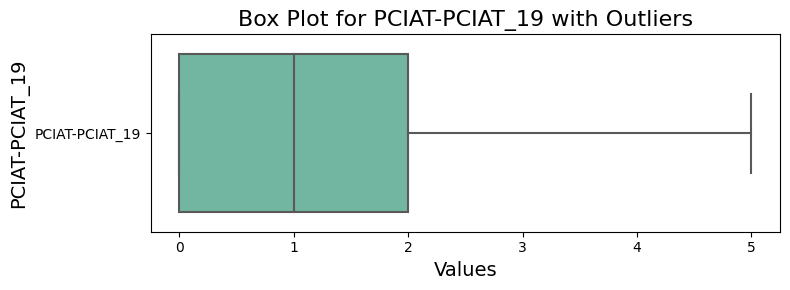

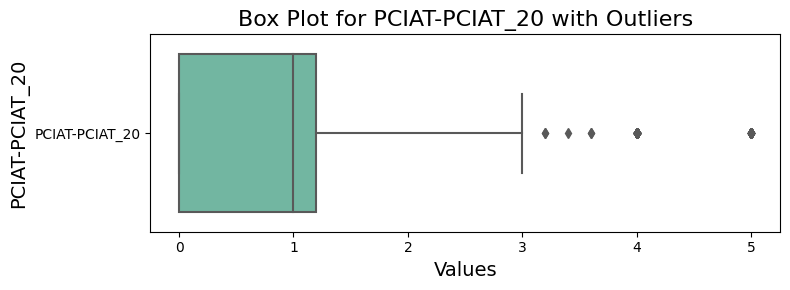

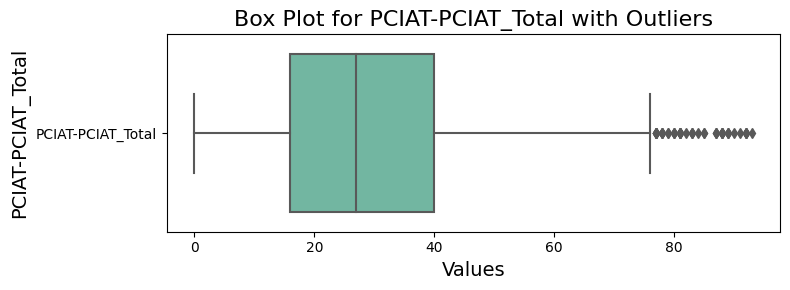

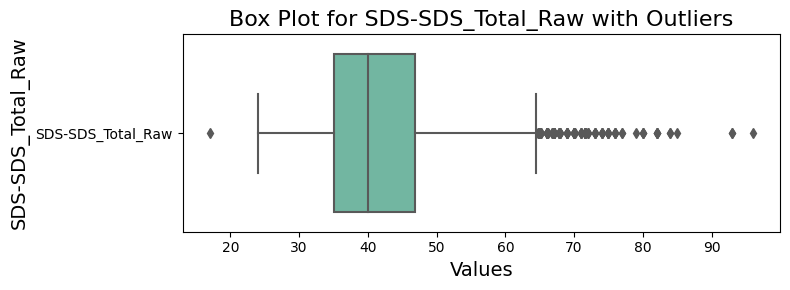

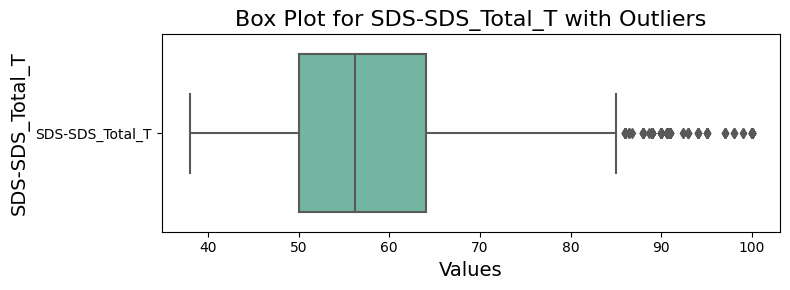

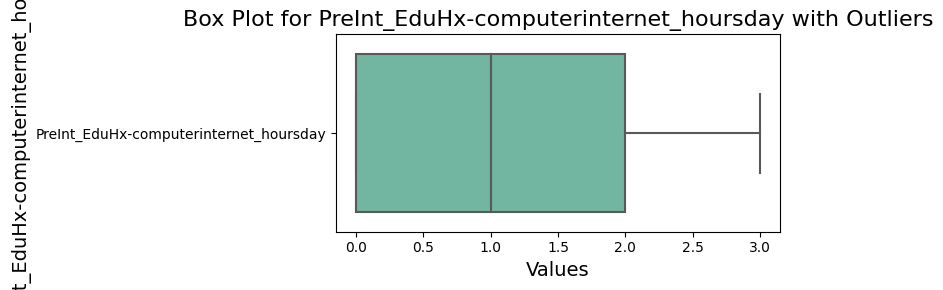

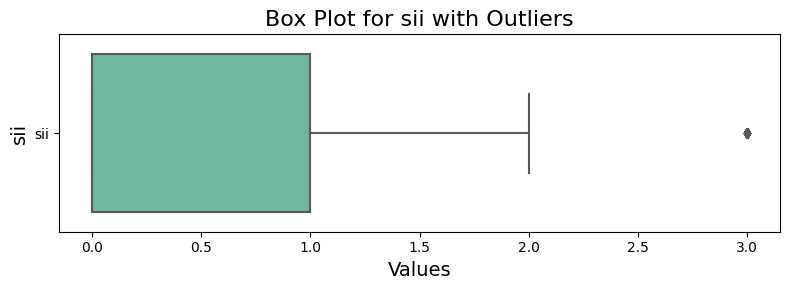

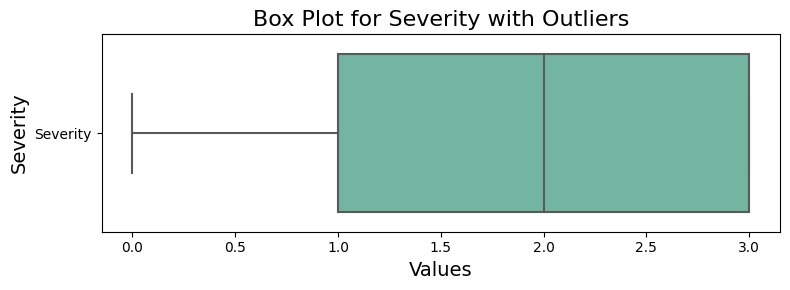

In [44]:
for column in data_cleaned.columns:
    plt.figure(figsize=(8, 3))  
    sns.boxplot(data=data_cleaned[[column]], orient='h', palette="Set2")
    
    plt.title(f'Box Plot for {column} with Outliers', fontsize=16)
    plt.ylabel(column, fontsize=14)
    plt.xlabel('Values', fontsize=14)
    
    plt.tight_layout()
    plt.show()


In [45]:
# Calculate IQR for the column 'CGAS-CGAS_Score'
Q1 = data_cleaned['CGAS-CGAS_Score'].quantile(0.25)
Q3 = data_cleaned['CGAS-CGAS_Score'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the entire DataFrame by keeping only rows where 'CGAS-CGAS_Score' is within bounds
data_copy = data_cleaned[(data_cleaned['CGAS-CGAS_Score'] >= lower_bound) & (data_cleaned['CGAS-CGAS_Score'] <= upper_bound)]



# Feature Engineering

## BMI To Heart rate Ratio

In [46]:
data_copy['HeartRate_BMI'] = data_copy['Physical-HeartRate'] * data_copy['Physical-BMI']

## Max Heart rate due to age

In [47]:
data_copy['HRmax'] = 220 - data_copy['Basic_Demos-Age']  # Estimate HRmax based on age

## Addation Feature 

In [48]:
def categorize_bmi(bmi):
    if bmi <= 18.5:
        return 0
    elif bmi <= 24.9:
        return 1
    elif bmi <= 29.9:
        return 2
    elif bmi <= 40:
        return 3
    else:
        return 4  

data_copy['BMI_Category'] = data_copy['Physical-BMI'].apply(categorize_bmi)

In [49]:
pciat_columns = [f'PCIAT-PCIAT_{i:02d}' for i in range(1, 21)]
data_copy['PCIAT_Time_Management'] = data_copy[pciat_columns[:5]].mean(axis=1)
data_copy['PCIAT_Withdrawal_Symptoms'] = data_copy[pciat_columns[5:10]].mean(axis=1)
data_copy['PCIAT_Neglect_Social_Life'] = data_copy[pciat_columns[10:15]].mean(axis=1)
data_copy['PCIAT_Lack_Control'] = data_copy[pciat_columns[15:]].mean(axis=1)



data_copy['PCIAT_mean'] = data_copy[pciat_columns].mean(axis=1)

In [50]:
def categorize_pciat(score):
    if score <= 20:
         return 0
    elif score <= 49:
          return 1
    elif score <= 79:
         return 2
    else:
         return 3
    
data_copy['PCIAT_Category'] = data_copy['PCIAT-PCIAT_Total'].apply(categorize_pciat)

In [51]:
def categorize_sds(score):
    if pd.isna(score) or score < 0:
        return np.nan
    elif score <= 20:
        return 0
    elif score <= 40:
        return 1
    elif score <= 60:
        return 2
    elif score <= 80:
        return 3
    else:
        return 4  

data_copy['SDS_Severity'] = data_copy['SDS-SDS_Total_Raw'].apply(categorize_sds)

In [52]:
data_copy['Sleep_Quality_Index'] = (data_copy['SDS-SDS_Total_T'] - data_copy['SDS-SDS_Total_T'].min()) / (data_copy['SDS-SDS_Total_T'].max() - data_copy['SDS-SDS_Total_T'].min())

In [53]:
data_copy['Physical_Health_Index'] = ((data_copy['Physical-BMI'] - data_copy['Physical-BMI'].mean()) / data_copy['Physical-BMI'].std() + (data_copy['Physical-Systolic_BP'] - data_copy['Physical-Systolic_BP'].mean()) / data_copy['Physical-Systolic_BP'].std() + (data_copy['Physical-HeartRate'] - data_copy['Physical-HeartRate'].mean()) / data_copy['Physical-HeartRate'].std()) / 3


In [54]:
data_copy['Sleep_Quality_Index'] = (data_copy['SDS-SDS_Total_T'] - data_copy['SDS-SDS_Total_T'].min()) / (data_copy['SDS-SDS_Total_T'].max() - data_copy['SDS-SDS_Total_T'].min())


In [55]:
fgc_columns = ['FGC-FGC_CU', 'FGC-FGC_PU', 'FGC-FGC_SRL', 'FGC-FGC_SRR', 'FGC-FGC_TL']

data_copy['Overall_Fitness_Score'] = data_copy[fgc_columns].mean(axis=1)
data_copy['Internet_Usage_Score'] = data_copy['PCIAT-PCIAT_Total'] / 100
data_copy['Physical_Activity_Score'] = data_copy['Overall_Fitness_Score'] / data_copy['Overall_Fitness_Score'].max()
data_copy['Lifestyle_Score'] = ((1 - data_copy['Internet_Usage_Score']) +  data_copy['Physical_Activity_Score'] + (1 - data_copy['Sleep_Quality_Index'])) / 3

In [56]:
def categorize_bp(systolic, diastolic):
    if systolic < 120 and diastolic < 80:
        return 0
    elif 120 <= systolic < 130 and diastolic < 80:
        return 1
    elif 130 <= systolic < 140 or 80 <= diastolic < 90:
        return 2
    else:
        return 3 

data_copy['BP_Category'] = data_copy.apply(lambda row: categorize_bp(row['Physical-Systolic_BP'], row['Physical-Diastolic_BP']), axis=1)

In [57]:
data_copy['BMI_Age_Interaction'] = data_copy['Physical-BMI'] * data_copy['Basic_Demos-Age']
data_copy['HeartRate_BPCategory_Interaction'] = data_copy['BP_Category'] * data_copy['Basic_Demos-Age']

In [58]:
data_copy = data_copy.drop(columns=['SDS-SDS_Total_T', 'SDS-SDS_Total_Raw', 'PCIAT-PCIAT_Total', 'Physical-Height', 'Physical-Weight', 'FGC-FGC_CU', 'FGC-FGC_PU', 'FGC-FGC_SRL', 'FGC-FGC_SRR', 'FGC-FGC_TL', 'FGC-FGC_CU_Zone', 'FGC-FGC_PU_Zone', 'FGC-FGC_SRR_Zone', 'FGC-FGC_SRL_Zone', 'FGC-FGC_TL_Zone', 'PCIAT-PCIAT_01', 'PCIAT-PCIAT_02', 'PCIAT-PCIAT_03', 'PCIAT-PCIAT_04', 'PCIAT-PCIAT_05', 'PCIAT-PCIAT_06', 'PCIAT-PCIAT_07', 'PCIAT-PCIAT_08', 'PCIAT-PCIAT_09', 'PCIAT-PCIAT_10', 'PCIAT-PCIAT_11', 'PCIAT-PCIAT_12', 'PCIAT-PCIAT_13', 'PCIAT-PCIAT_14', 'PCIAT-PCIAT_15', 'PCIAT-PCIAT_16', 'PCIAT-PCIAT_17', 'PCIAT-PCIAT_18', 'PCIAT-PCIAT_19', 'PCIAT-PCIAT_20'])



data_copy = data_copy.drop(columns=['PCIAT_Time_Management', 'PCIAT_Withdrawal_Symptoms', 'PCIAT_Neglect_Social_Life', 'PCIAT_Lack_Control',  'Basic_Demos-Age', 'Physical-BMI'])

## Body Strength & Flexibility

In [59]:
# data_copy['BodyStrength&Flexibility'] = data_copy['FGC-FGC_CU'] + data_copy['FGC-FGC_PU'] + data_copy['FGC-FGC_SRL'] + data_copy['FGC-FGC_SRR'] + data_copy['FGC-FGC_TL']
# data_copy['BodyStrength&Flexibility_class'] = data_copy['FGC-FGC_CU_Zone'] + data_copy['FGC-FGC_PU_Zone'] + data_copy['FGC-FGC_SRL_Zone'] + data_copy['FGC-FGC_SRR_Zone'] + data_copy['FGC-FGC_TL_Zone']

# data_copy = data_copy.drop(['FGC-FGC_CU','FGC-FGC_PU','FGC-FGC_SRL','FGC-FGC_SRR','FGC-FGC_TL'], axis=1)

# data_copy = data_copy.drop(['FGC-FGC_CU_Zone','FGC-FGC_PU_Zone','FGC-FGC_SRL_Zone','FGC-FGC_SRR_Zone','FGC-FGC_TL_Zone'], axis=1)                          


In [60]:
data_copy.shape

(3635, 25)

# Transfomation and scaling

## Data Splitting 

In [61]:
from sklearn.model_selection import train_test_split

X = data_copy.drop('sii', axis=1)  
y = data_copy['sii']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2544, 24) (1091, 24) (2544,) (1091,)


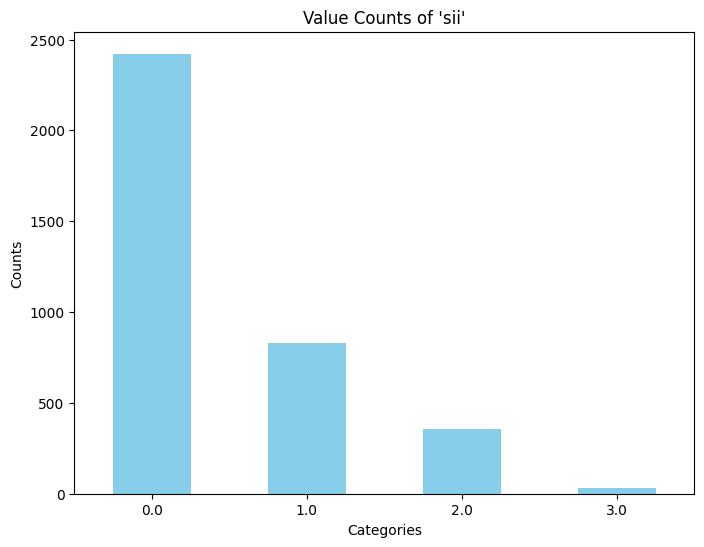

In [62]:
value_counts = data_copy['sii'].value_counts()

# Plotting the value counts
plt.figure(figsize=(8, 6))
value_counts.plot(kind='bar', color='skyblue')
plt.title("Value Counts of 'sii'")
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.xticks(rotation=0)
plt.show()

## Handling imbalanced data 

In [63]:
from collections import Counter
from imblearn.over_sampling import SMOTE

# Check the class distribution before applying SMOTE
class_distribution_before = Counter(y_train)
print("Class distribution before SMOTE:", class_distribution_before)

# Initialize SMOTE with specified parameters
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Apply SMOTE to the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the class distribution after applying SMOTE
class_distribution_after = Counter(y_train_resampled)
print("Class distribution after SMOTE:", class_distribution_after)

Class distribution before SMOTE: Counter({0.0: 1684, 1.0: 595, 2.0: 244, 3.0: 21})
Class distribution after SMOTE: Counter({0.0: 1684, 1.0: 1684, 2.0: 1684, 3.0: 1684})


In [64]:
y_train = y_train_resampled

## Scaling

In [65]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()  # or StandardScaler()

# Fit the scaler on X_train and transform both X_train and X_test
X_train = pd.DataFrame(scaler.fit_transform(X_train_resampled), columns=X_train_resampled.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)


In [66]:
X_train.shape


(6736, 24)

In [67]:
X_test.shape

(1091, 24)

# PCA

In [68]:
from sklearn.decomposition import PCA 
pca = PCA(n_components= 20 )  # Reduce to 2 components
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# Modeling 

In [69]:
# pip install lazypredict

In [70]:
# from lazypredict.Supervised import LazyClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.datasets import load_iris
# import pandas as pd



# clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)

# models, predictions = clf.fit(X_train, X_test, y_train, y_test)

# print(models)

In [71]:
result1, result2, result3 = [], [], [] 

In [72]:
train_f1_scores = []
test_f1_scores = []
model_names = []

def modeling(model, model_name):
    # Fit the model using the scaled resampled training data
    global train_f1_scores, test_f1_scores, model_names

    model.fit(X_train, y_train_resampled)  # Use y_train_resampled here
    
    # Predictions
    train_pred = model.predict(X_train)    # Predictions on the scaled resampled train set
    test_pred = model.predict(X_test)      # Predictions on the scaled original test set
    
    # Calculate metrics with specified average
    train_accuracy = accuracy_score(y_train_resampled, train_pred) * 100
    train_recall = recall_score(y_train_resampled, train_pred, average='weighted') * 100
    train_f1_score = f1_score(y_train_resampled, train_pred, average='weighted') * 100
    
    test_accuracy = accuracy_score(y_test, test_pred) * 100
    test_recall = recall_score(y_test, test_pred, average='weighted') * 100
    test_f1_score = f1_score(y_test, test_pred, average='weighted') * 100


    train_f1_scores.append(train_f1_score)
    test_f1_scores.append(test_f1_score)
    model_names.append(model_name)

    
    # Append results
    result1.append(test_accuracy)
    result2.append(test_recall)
    result3.append(test_f1_score)
    
    print("Classification Report for Test Data:")
    print(classification_report(y_test, test_pred))
    
    print("\nClassification Report for Scaled Resampled Train Data:")
    print(classification_report(y_train_resampled, train_pred))  # Use y_train_resampled here
    
    # Accuracy, Recall, and F1 Scores
    print(f'Training Accuracy: {train_accuracy}, Train Recall: {train_recall}, Train F1: {train_f1_score}')
    print(f'Test Accuracy: {test_accuracy}, Test Recall: {test_recall}, Test F1: {test_f1_score}')
    
    # Confusion matrix
    cm = confusion_matrix(y_test, test_pred)
    sns.heatmap(cm, annot=True, fmt='0.2f', cmap='YlGnBu', linewidths=1)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    

    labels = ['Train F1 Score', 'Test F1 Score']
    scores = [train_f1_score, test_f1_score]

    plt.figure(figsize=(4, 7))  # Larger figure for better design
    bars = plt.bar(labels, scores, color=['#1f77b4', '#ff7f0e'], edgecolor='black')

    plt.ylim(0, 100)  # Since F1 scores are percentages, 0 to 100 is the range
    plt.title(f'F1 Score Comparison: {model_name}', fontsize=14)
    plt.ylabel('F1 Score (%)')
    
    # Display values in the center of the bars
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height/2, f'{height:.2f}%', 
                 ha='center', va='center', color='white', fontsize=12)

    plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines for better readability
    plt.tight_layout()
    plt.show()

Classification Report for Test Data:
              precision    recall  f1-score   support

         0.0       0.98      0.97      0.97       738
         1.0       0.91      0.91      0.91       235
         2.0       1.00      1.00      1.00       110
         3.0       0.67      1.00      0.80         8

    accuracy                           0.96      1091
   macro avg       0.89      0.97      0.92      1091
weighted avg       0.96      0.96      0.96      1091


Classification Report for Scaled Resampled Train Data:
              precision    recall  f1-score   support

         0.0       0.96      0.97      0.96      1684
         1.0       0.97      0.96      0.96      1684
         2.0       1.00      1.00      1.00      1684
         3.0       1.00      1.00      1.00      1684

    accuracy                           0.98      6736
   macro avg       0.98      0.98      0.98      6736
weighted avg       0.98      0.98      0.98      6736

Training Accuracy: 98.14429928741093,

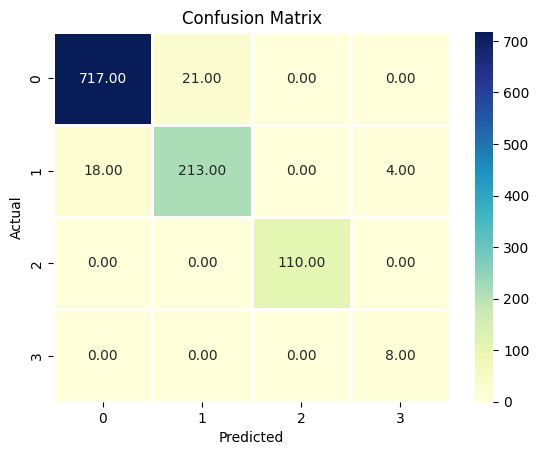

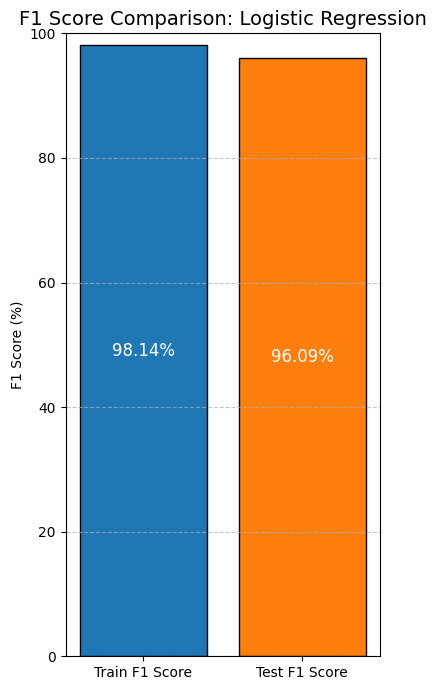

In [73]:
from sklearn.linear_model import LogisticRegression  
logistic_regression = LogisticRegression()
modeling(logistic_regression, 'Logistic Regression')

Classification Report for Test Data:
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98       738
         1.0       0.94      0.91      0.93       235
         2.0       0.99      0.95      0.97       110
         3.0       0.78      0.88      0.82         8

    accuracy                           0.97      1091
   macro avg       0.92      0.93      0.93      1091
weighted avg       0.97      0.97      0.97      1091


Classification Report for Scaled Resampled Train Data:
              precision    recall  f1-score   support

         0.0       0.99      0.98      0.98      1684
         1.0       0.98      0.99      0.98      1684
         2.0       1.00      1.00      1.00      1684
         3.0       1.00      1.00      1.00      1684

    accuracy                           0.99      6736
   macro avg       0.99      0.99      0.99      6736
weighted avg       0.99      0.99      0.99      6736

Training Accuracy: 99.24287410926365,

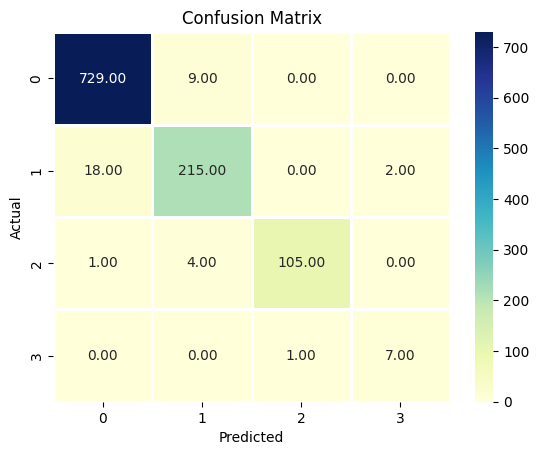

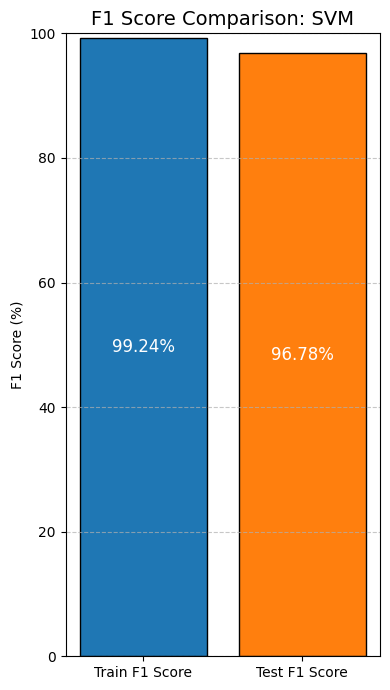

In [74]:
SVM = SVC()
modeling(SVM, 'SVM')

Classification Report for Test Data:
              precision    recall  f1-score   support

         0.0       0.96      0.93      0.94       738
         1.0       0.74      0.78      0.76       235
         2.0       0.67      0.69      0.68       110
         3.0       0.24      0.50      0.32         8

    accuracy                           0.87      1091
   macro avg       0.65      0.72      0.68      1091
weighted avg       0.88      0.87      0.87      1091


Classification Report for Scaled Resampled Train Data:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1684
         1.0       1.00      1.00      1.00      1684
         2.0       1.00      1.00      1.00      1684
         3.0       1.00      1.00      1.00      1684

    accuracy                           1.00      6736
   macro avg       1.00      1.00      1.00      6736
weighted avg       1.00      1.00      1.00      6736

Training Accuracy: 100.0, Train Recal

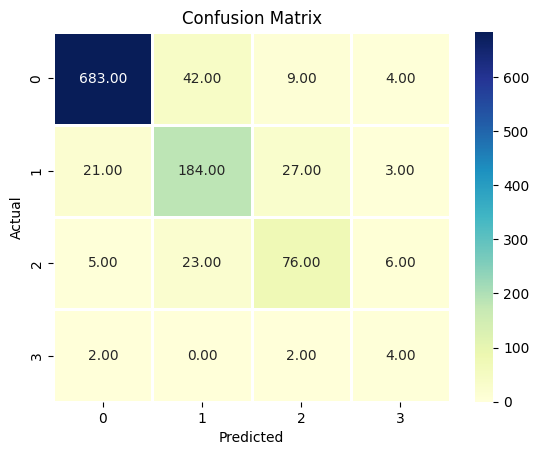

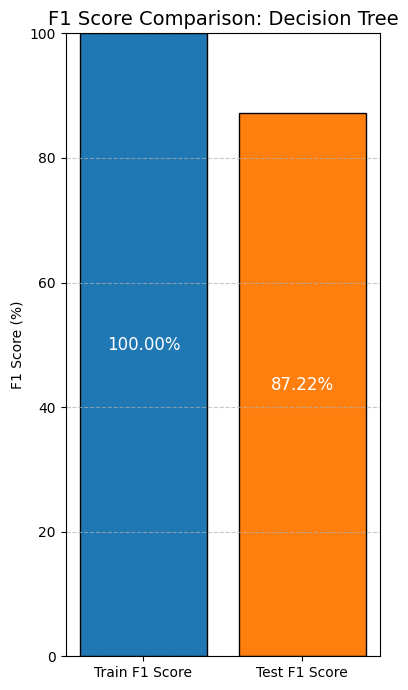

In [75]:
decision_tree_classifier = DecisionTreeClassifier()
modeling(decision_tree_classifier, 'Decision Tree')

Classification Report for Test Data:
              precision    recall  f1-score   support

         0.0       0.97      0.90      0.94       738
         1.0       0.71      0.73      0.72       235
         2.0       0.58      0.75      0.65       110
         3.0       0.19      0.50      0.28         8

    accuracy                           0.85      1091
   macro avg       0.61      0.72      0.65      1091
weighted avg       0.87      0.85      0.86      1091


Classification Report for Scaled Resampled Train Data:
              precision    recall  f1-score   support

         0.0       0.97      0.94      0.96      1684
         1.0       0.90      0.85      0.87      1684
         2.0       0.85      0.93      0.89      1684
         3.0       0.99      0.97      0.98      1684

    accuracy                           0.92      6736
   macro avg       0.93      0.92      0.92      6736
weighted avg       0.93      0.92      0.92      6736

Training Accuracy: 92.35451306413302,

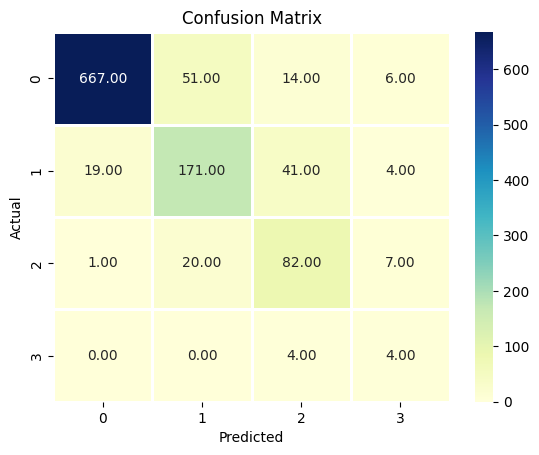

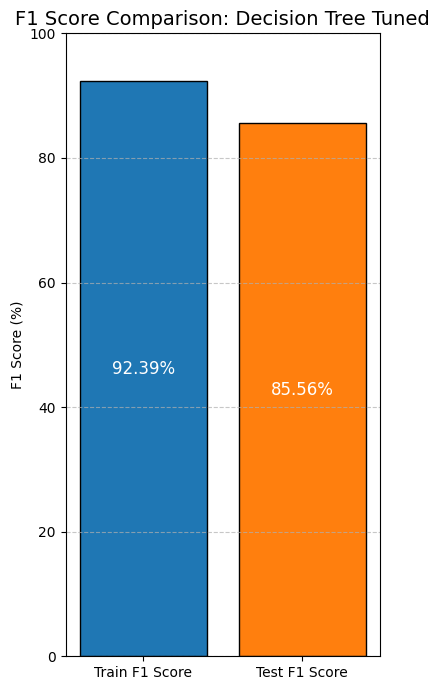

In [76]:
decision_tree_classifier = DecisionTreeClassifier( max_depth= 7 , min_samples_split= 7)
modeling(decision_tree_classifier, 'Decision Tree Tuned')

Classification Report for Test Data:
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97       738
         1.0       0.97      0.86      0.91       235
         2.0       0.96      1.00      0.98       110
         3.0       1.00      0.50      0.67         8

    accuracy                           0.96      1091
   macro avg       0.97      0.84      0.88      1091
weighted avg       0.96      0.96      0.96      1091


Classification Report for Scaled Resampled Train Data:
              precision    recall  f1-score   support

         0.0       0.90      0.99      0.94      1684
         1.0       0.99      0.89      0.94      1684
         2.0       1.00      1.00      1.00      1684
         3.0       1.00      1.00      1.00      1684

    accuracy                           0.97      6736
   macro avg       0.97      0.97      0.97      6736
weighted avg       0.97      0.97      0.97      6736

Training Accuracy: 96.94180522565321,

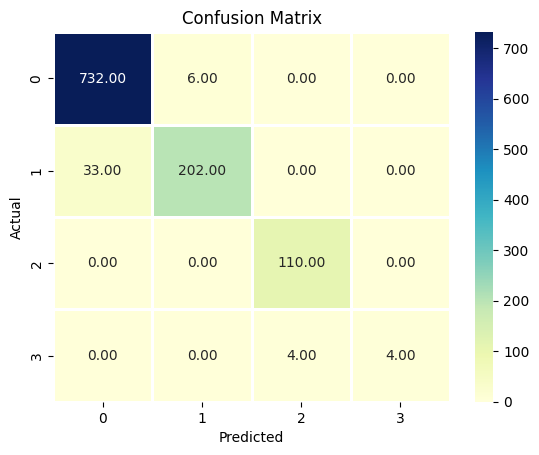

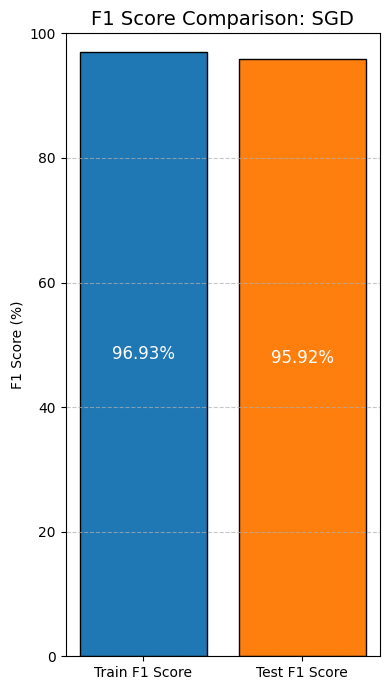

In [77]:
sgd_classifier = SGDClassifier(max_iter = 500) 
modeling(sgd_classifier, 'SGD')

Classification Report for Test Data:
              precision    recall  f1-score   support

         0.0       0.97      0.90      0.93       738
         1.0       0.73      0.86      0.79       235
         2.0       0.73      0.83      0.78       110
         3.0       0.36      0.50      0.42         8

    accuracy                           0.88      1091
   macro avg       0.70      0.77      0.73      1091
weighted avg       0.89      0.88      0.88      1091


Classification Report for Scaled Resampled Train Data:
              precision    recall  f1-score   support

         0.0       0.99      0.94      0.96      1684
         1.0       0.95      0.99      0.97      1684
         2.0       0.98      1.00      0.99      1684
         3.0       1.00      1.00      1.00      1684

    accuracy                           0.98      6736
   macro avg       0.98      0.98      0.98      6736
weighted avg       0.98      0.98      0.98      6736

Training Accuracy: 98.09976247030879,

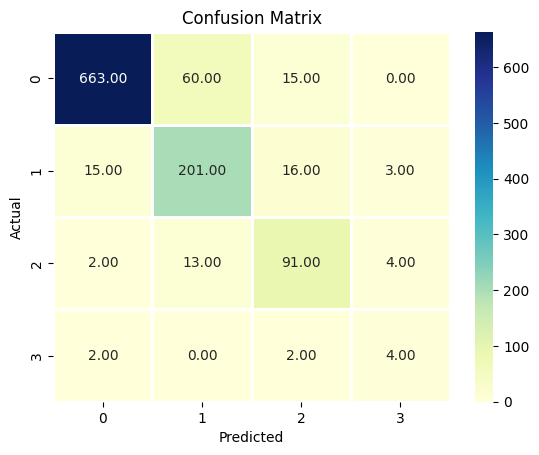

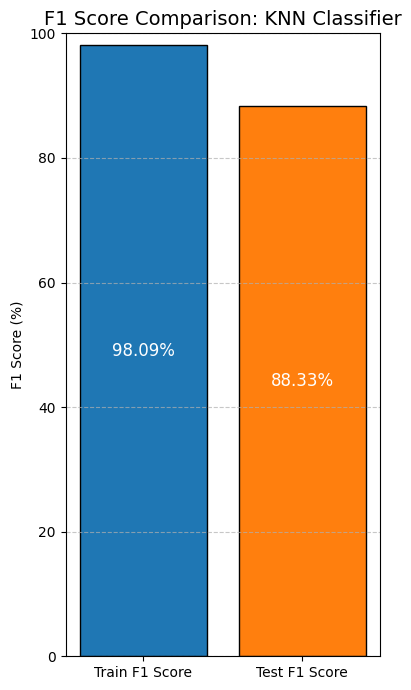

In [78]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
modeling(knn, 'KNN Classifier')

Classification Report for Test Data:
              precision    recall  f1-score   support

         0.0       0.96      0.95      0.95       738
         1.0       0.70      0.74      0.72       235
         2.0       0.62      0.55      0.58       110
         3.0       0.27      0.38      0.32         8

    accuracy                           0.86      1091
   macro avg       0.64      0.66      0.64      1091
weighted avg       0.86      0.86      0.86      1091


Classification Report for Scaled Resampled Train Data:
              precision    recall  f1-score   support

         0.0       0.91      0.96      0.93      1684
         1.0       0.81      0.76      0.78      1684
         2.0       0.84      0.85      0.84      1684
         3.0       0.98      0.98      0.98      1684

    accuracy                           0.89      6736
   macro avg       0.89      0.89      0.89      6736
weighted avg       0.89      0.89      0.89      6736

Training Accuracy: 88.70249406175772,

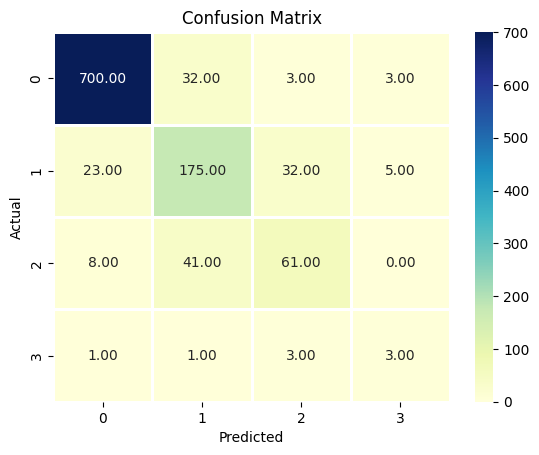

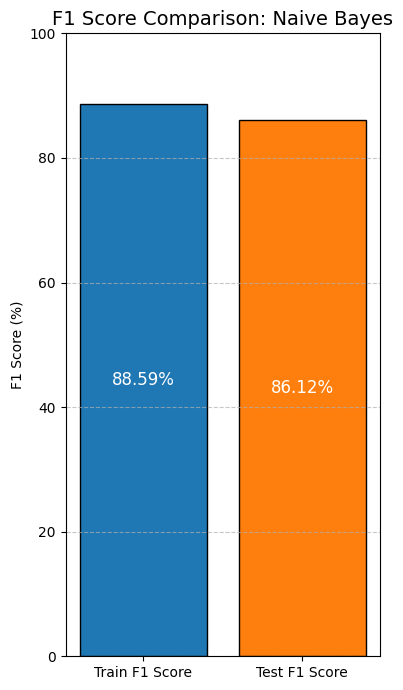

In [79]:
from sklearn.naive_bayes import GaussianNB

# Create an instance of GaussianNB
naive_bayes = GaussianNB()

# Call your modeling function
modeling(naive_bayes, 'Naive Bayes')

Classification Report for Test Data:
              precision    recall  f1-score   support

         0.0       0.98      0.97      0.98       738
         1.0       0.89      0.91      0.90       235
         2.0       0.88      0.90      0.89       110
         3.0       0.50      0.25      0.33         8

    accuracy                           0.95      1091
   macro avg       0.81      0.76      0.77      1091
weighted avg       0.95      0.95      0.95      1091


Classification Report for Scaled Resampled Train Data:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1684
         1.0       1.00      1.00      1.00      1684
         2.0       1.00      1.00      1.00      1684
         3.0       1.00      1.00      1.00      1684

    accuracy                           1.00      6736
   macro avg       1.00      1.00      1.00      6736
weighted avg       1.00      1.00      1.00      6736

Training Accuracy: 100.0, Train Recal

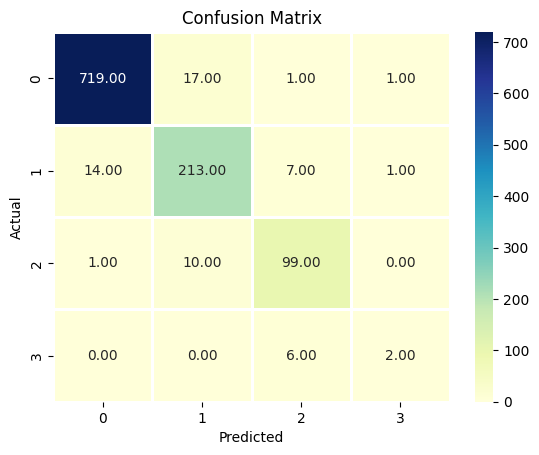

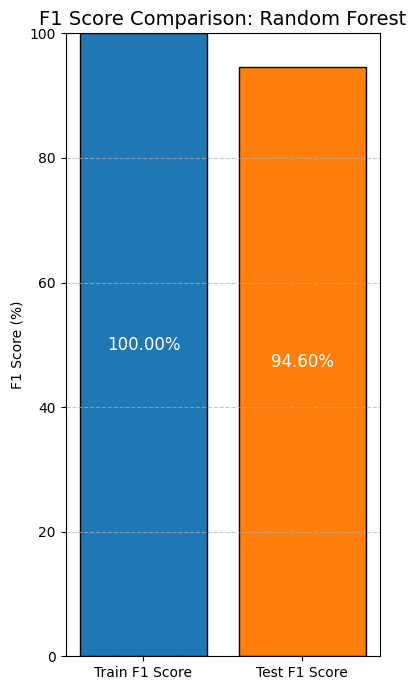

In [80]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state=1)
modeling(random_forest, 'Random Forest')

Classification Report for Test Data:
              precision    recall  f1-score   support

         0.0       0.97      0.80      0.88       738
         1.0       0.50      0.65      0.57       235
         2.0       0.53      0.86      0.66       110
         3.0       0.75      0.38      0.50         8

    accuracy                           0.77      1091
   macro avg       0.69      0.67      0.65      1091
weighted avg       0.83      0.77      0.79      1091


Classification Report for Scaled Resampled Train Data:
              precision    recall  f1-score   support

         0.0       0.96      0.82      0.88      1684
         1.0       0.77      0.70      0.73      1684
         2.0       0.77      0.96      0.86      1684
         3.0       1.00      1.00      1.00      1684

    accuracy                           0.87      6736
   macro avg       0.87      0.87      0.87      6736
weighted avg       0.87      0.87      0.87      6736

Training Accuracy: 86.77256532066508,

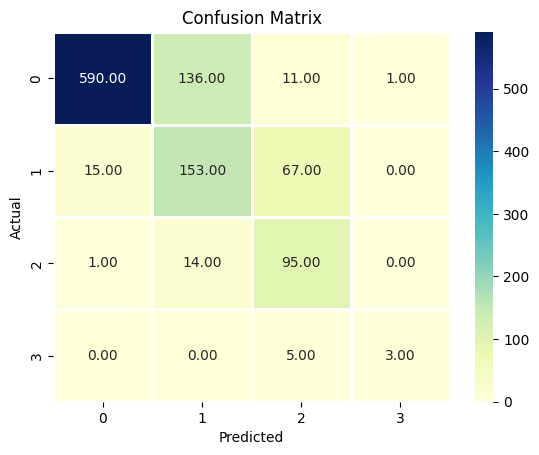

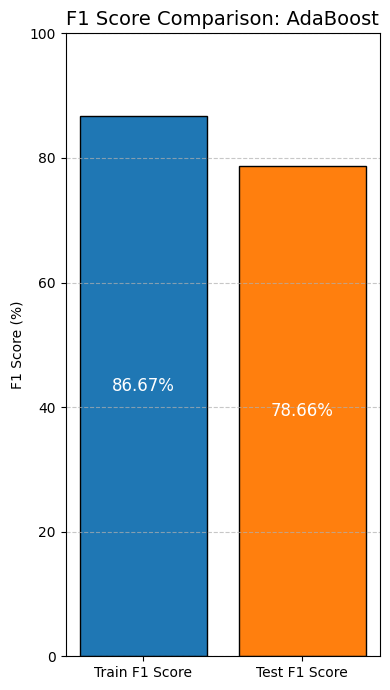

In [81]:
adaBosster=AdaBoostClassifier( n_estimators=50)
modeling(adaBosster, 'AdaBoost')

Classification Report for Test Data:
              precision    recall  f1-score   support

         0.0       0.98      0.97      0.98       738
         1.0       0.89      0.91      0.90       235
         2.0       0.88      0.89      0.88       110
         3.0       0.27      0.38      0.32         8

    accuracy                           0.94      1091
   macro avg       0.76      0.79      0.77      1091
weighted avg       0.95      0.94      0.95      1091


Classification Report for Scaled Resampled Train Data:
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      1684
         1.0       0.99      0.99      0.99      1684
         2.0       1.00      1.00      1.00      1684
         3.0       1.00      1.00      1.00      1684

    accuracy                           1.00      6736
   macro avg       1.00      1.00      1.00      6736
weighted avg       1.00      1.00      1.00      6736

Training Accuracy: 99.5249406175772, 

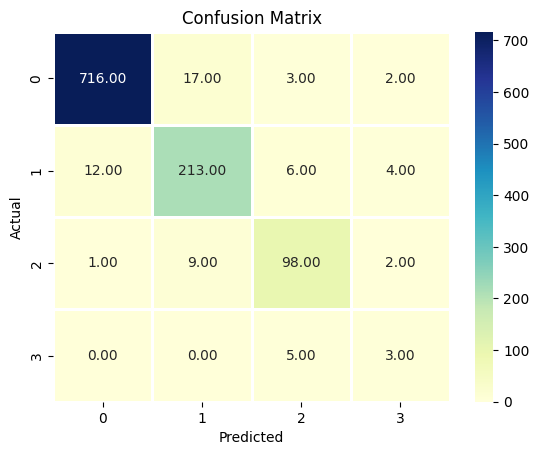

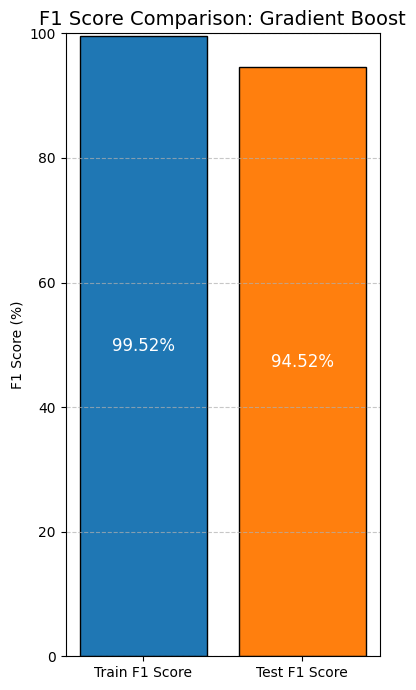

In [82]:
from sklearn.ensemble import GradientBoostingClassifier

gradient=GradientBoostingClassifier()
modeling(gradient, 'Gradient Boost')

In [83]:
def plot_f1_scores():
    plt.figure(figsize=(12, 6))
    x = range(len(model_names))
    
    plt.plot(x, train_f1_scores, 'bo-', label='Training F1 Score')
    plt.plot(x, test_f1_scores, 'ro-', label='Testing F1 Score')
    
    plt.xlabel('Models')
    plt.ylabel('F1 Score (Weighted)')
    plt.title('Training and Testing F1 Scores for Different Models')
    plt.xticks(x, model_names, rotation=45, ha='right')
    plt.legend()
    plt.tight_layout()
    plt.show()

def plot_f1_scores1():
    plt.figure(figsize=(12, 6))
    
    x = np.arange(len(model_names))  # the label locations
    width = 0.35  # the width of the bars
    
    # Create the bars
    rects1 = plt.bar(x - width/2, train_f1_scores, width, label='Train', color='blue', alpha=0.7)
    rects2 = plt.bar(x + width/2, test_f1_scores, width, label='Test', color='red', alpha=0.7)

    # Add some text for labels, title and custom x-axis tick labels, etc.
    plt.ylabel('F1 Score (Weighted)')
    plt.title('F1 Scores for Different Models (Training and Testing)')
    plt.xticks(x, model_names, rotation=45, ha='right')
    plt.legend()

    # Add value labels on the bars
    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            plt.annotate(f'{height:.1f}',
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')

    autolabel(rects1)
    autolabel(rects2)

    plt.tight_layout()
    plt.show()


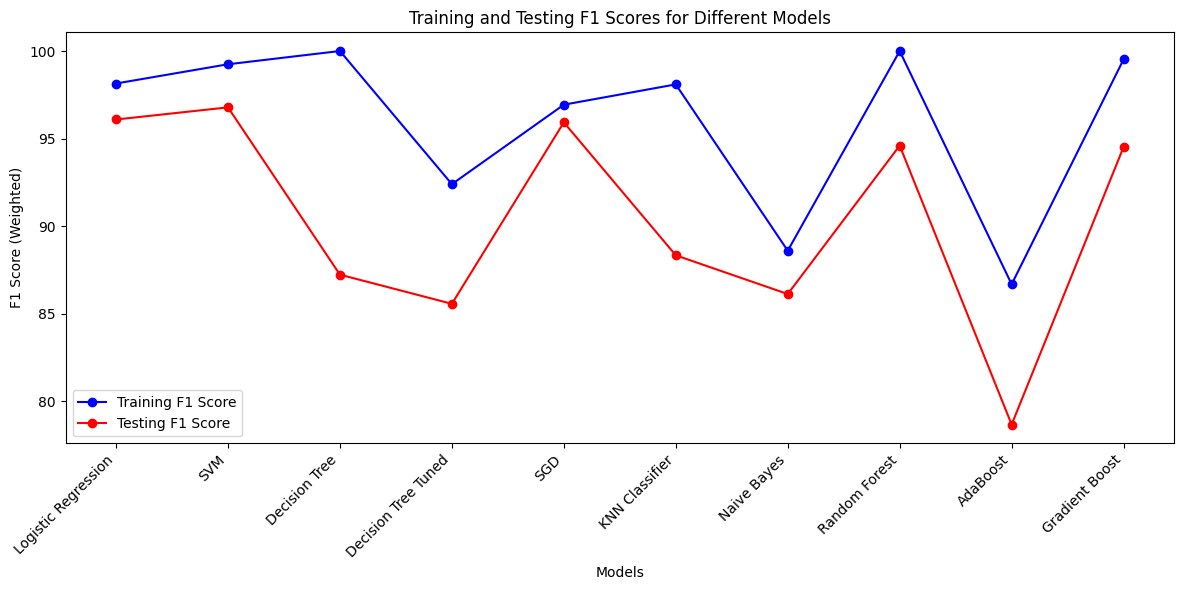

In [84]:
plot_f1_scores()

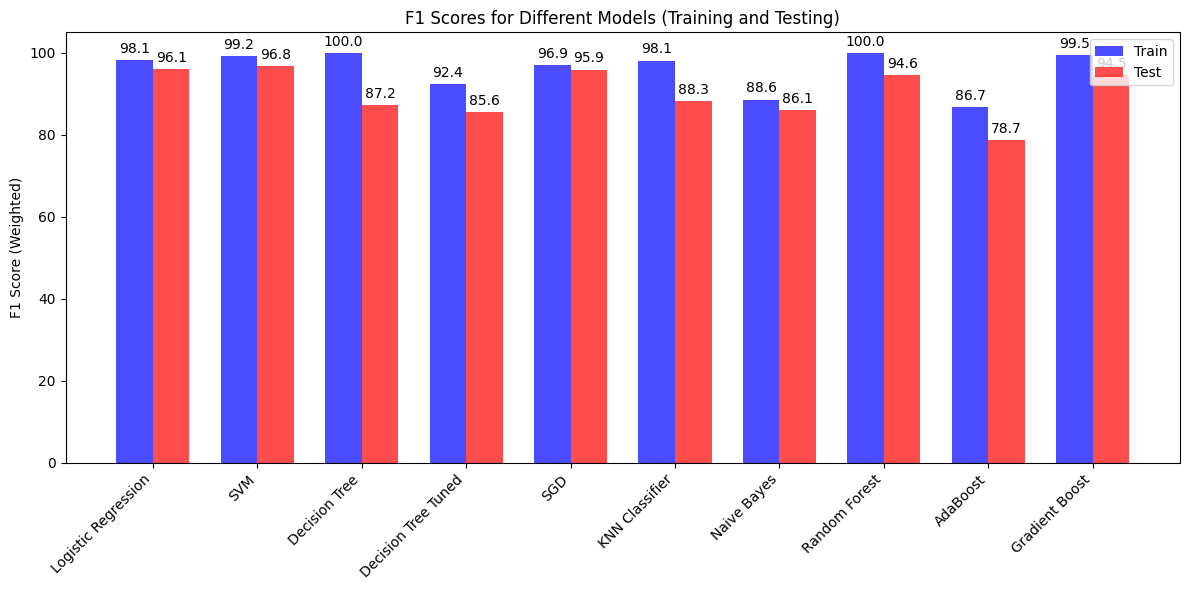

In [85]:
plot_f1_scores1()